<div>
    <center>
        <span style="font-size: 50px; font-family: Montserrat; font-weight: 700;">Breast Cancer Prediction</span>
        <br>
        <span style="font-size: 25px; font-family: Montserrat; font-weight: 200; text-align: center;">with <span style="font-weight: 600;">Support Vector Machines</span></span>
    </center>
</div>
<hr>

<hr>
<center>
    <div style="font-family: Montserrat; line-height: 1.5; font-size: 14px; font-weight: 400;">Welcome to my notebook! Have a good time reading this notebook project! If you have <b><mark>any suggestions</mark></b> for me, please <b><mark>let me know</mark></b>. And if you <b><mark>like my work</mark></b>, please <b><mark>give me an upvote</mark></b>. Thank you!</div>
</center>
<hr>

# <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">1 | Introduction </div>
<center>
    <img src="https://images.unsplash.com/photo-1598885159329-9377168ac375?q=80&w=1473&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D" alt="" width="60%">
</center>

## <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">1.1 | About Dataset </div>
<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">
    Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.
    <br>
    The key challenges against it’s detection is how to classify tumors into malignant (cancerous) or benign (non cancerous).
</div>

## <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">1.2 | Objectives </div>
<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">
    This project aims to:
    <ol>
        <li>Understand the dataset with data exploration and data visualization.</li>
        <li>Build a LinearSVC model to predict whether the cancer is malignant or benign.</li>
    </ol>
</div>

## <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">1.3 | Machine Learning Module </div>
<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">
    The model used in this project:
    <ol>
        <li>Linear Support Vector Classification (LinearSVC).</li>
    </ol>
</div>

<br>



# <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">2 | Importing Libraries </div>
<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">
    In this section, I import all the libraries that I need in this project. Those libraries include:
    <ul>
        <li>NumPy <b>=></b> A Python library that provides powerful and versatile array computations, mathematical functions, and other tools for data analysis and visualization.</li>
        <li>Pandas <b>=></b> A tool for data analysis and manipulation.</li>
        <li>Matplotlib <b>=></b> Data visualization.</li>
        <li>Seaborn <b>=></b> Data visualization.</li>
        <li>Scikit-learn <b>=></b> Machine learning library.</li>
        <li>Yellowbrick <b>=></b> A Python library that extends the Scikit-Learn API to make model selection and hyperparameter tuning easier.</li>
    </ul>
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.model_selection import LearningCurve, FeatureImportances

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/breast-cancer-dataset/breast-cancer.csv


# <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">3 | Reading the Dataset </div>
<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">
    In this section, I load the dataset into this notebook using Pandas. The file format for the dataset is a CSV file.
</div>

In [2]:
# -- Loading Dataset --
df = pd.read_csv('/kaggle/input/breast-cancer-dataset/breast-cancer.csv')
df.head().style.background_gradient(cmap='pink').hide()

id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
842302,M,17.990000,10.380000,122.800000,1001.000000,0.118400,0.277600,0.300100,0.147100,0.241900,0.078710,1.095000,0.905300,8.589000,153.400000,0.006399,0.049040,0.053730,0.015870,0.030030,0.006193,25.380000,17.330000,184.600000,2019.000000,0.162200,0.665600,0.711900,0.265400,0.460100,0.118900
842517,M,20.570000,17.770000,132.900000,1326.000000,0.084740,0.078640,0.086900,0.070170,0.181200,0.056670,0.543500,0.733900,3.398000,74.080000,0.005225,0.013080,0.018600,0.013400,0.013890,0.003532,24.990000,23.410000,158.800000,1956.000000,0.123800,0.186600,0.241600,0.186000,0.275000,0.089020
84300903,M,19.690000,21.250000,130.000000,1203.000000,0.109600,0.159900,0.197400,0.127900,0.206900,0.059990,0.745600,0.786900,4.585000,94.030000,0.006150,0.040060,0.038320,0.020580,0.022500,0.004571,23.570000,25.530000,152.500000,1709.000000,0.144400,0.424500,0.450400,0.243000,0.361300,0.087580
84348301,M,11.420000,20.380000,77.580000,386.100000,0.142500,0.283900,0.241400,0.105200,0.259700,0.097440,0.495600,1.156000,3.445000,27.230000,0.009110,0.074580,0.056610,0.018670,0.059630,0.009208,14.910000,26.500000,98.870000,567.700000,0.209800,0.866300,0.686900,0.257500,0.663800,0.173000
84358402,M,20.290000,14.340000,135.100000,1297.000000,0.100300,0.132800,0.198000,0.104300,0.180900,0.058830,0.757200,0.781300,5.438000,94.440000,0.011490,0.024610,0.056880,0.018850,0.017560,0.005115,22.540000,16.670000,152.200000,1575.000000,0.137400,0.205000,0.400000,0.162500,0.236400,0.076780


In [3]:
# -- Dataset Information --
print('Total Rows\t: ', df.shape[0])
print('Total Columns\t: ', df.shape[1])

Total Rows	:  569
Total Columns	:  32


In [4]:
# -- Dataset Summary --
df.info(memory_usage = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
# -- NULL Values --
print(df.isna().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [6]:
# -- Duplicated Data --
print('Total duplicated data in this dataset: ', df.duplicated().sum())

Total duplicated data in this dataset:  0


In [7]:
# -- Rename concave point column --
df.rename(columns={'concave points_mean': 'concave_points_mean', 'concave points_se': 'concave_points_se', 'concave points_worst': 'concave_points_worst'}, inplace=True)

# <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">4 | Initial Data Exploration </div>
<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">
    This section will be focused on dataset understanding through data exploration. Since all the data are numerical, the data exploration will contain a box plot and histogram.
</div>

In [8]:
df.describe().T.style.background_gradient(cmap='pink').set_properties(**{'font-family': 'Montserrat'})

,count,mean,std,min,25%,50%,75%,max
id,569.000000,30371831.432337,125020585.612224,8670.000000,869218.000000,906024.000000,8813129.000000,911320502.000000
radius_mean,569.000000,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.110000
texture_mean,569.000000,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.280000
perimeter_mean,569.000000,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.500000
area_mean,569.000000,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.000000
smoothness_mean,569.000000,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.163400
compactness_mean,569.000000,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.345400
concavity_mean,569.000000,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.426800
concave_points_mean,569.000000,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.201200
symmetry_mean,569.000000,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.304000


## <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">4.1 | radius_mean </div>
<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">
    Radius of Lobes
</div>

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


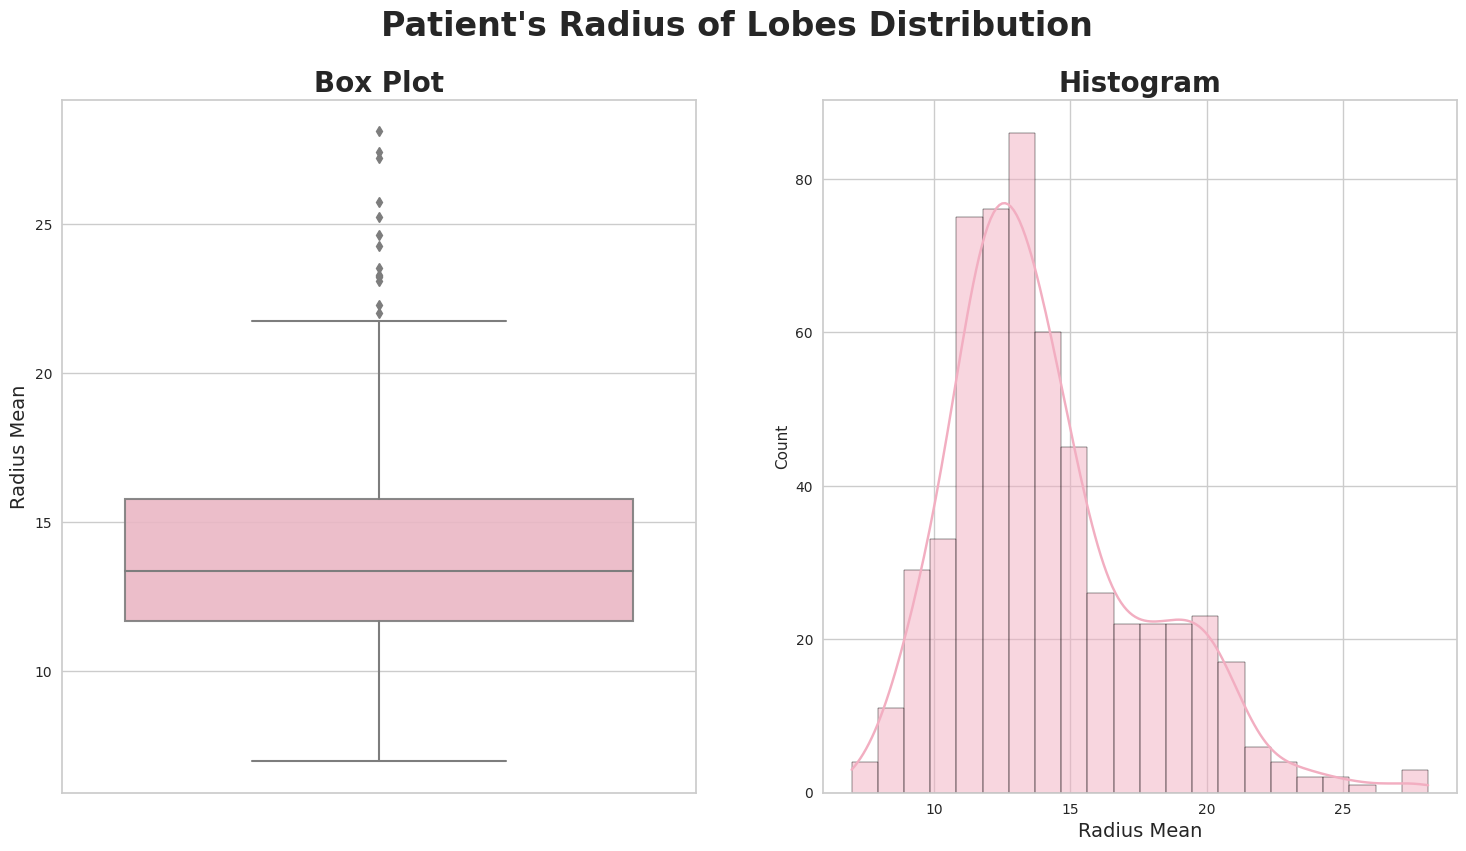

In [9]:
color = '#F2AEC1'
fig = plt.figure(figsize=(18,9))

fig.suptitle("Patient's Radius of Lobes Distribution", fontweight='heavy', fontsize='24')

ax1 = fig.add_subplot(1,2,1)
plt.title('Box Plot', fontweight='bold', fontsize='20')
sns.boxplot(data=df, y='radius_mean', color=color, boxprops=dict(alpha=0.9), linewidth=1.5)
plt.ylabel('Radius Mean', fontweight='medium', fontsize='14')

ax2 = fig.add_subplot(1,2,2)
plt.title('Histogram', fontweight='bold', fontsize='20')
sns.histplot(data=df, x='radius_mean', kde=True, color=color)
plt.xlabel('Radius Mean', fontweight='medium', fontsize='14')

plt.show()

In [10]:
# -- IQR Calculation --
q1 = np.percentile(df['radius_mean'], 25)
q3 = np.percentile(df['radius_mean'], 75)
iqr = q3 - q1

# -- Lower Limit Calculation --
ll = q1 - (1.5 * iqr)

# -- Upper Limit Calculation --
ul = q3 + (1.5 * iqr)

# -- Print --
print("Calculation result\n")
print("Inter Quartil Range\t: {:.3f}".format(iqr))
print("Lower Limit\t\t: {:.3f}".format(ll))
print("Upper Limit\t\t: {:.3f}".format(ul))

Calculation result

Inter Quartil Range	: 4.080
Lower Limit		: 5.580
Upper Limit		: 21.900


<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">From the calculation, we have an <b>Inter Quartile Range</b> value of <b><mark>4.080</mark></b>, a <b>Lower Limit</b> value of <b><mark>5.580</b></mark>, and an <b>Upper Limit</b> value of <b><mark>21.900</b></mark>. Also, it can be seen from the box plot, there are <b><mark>some outliers</b></mark> on the upper side of the data. The histogram also says that the data are <b><mark>left skewed</b></mark>.</div>

## <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">4.2 | texture_mean </div>
<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">
    Mean of Surface Textures
</div>

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


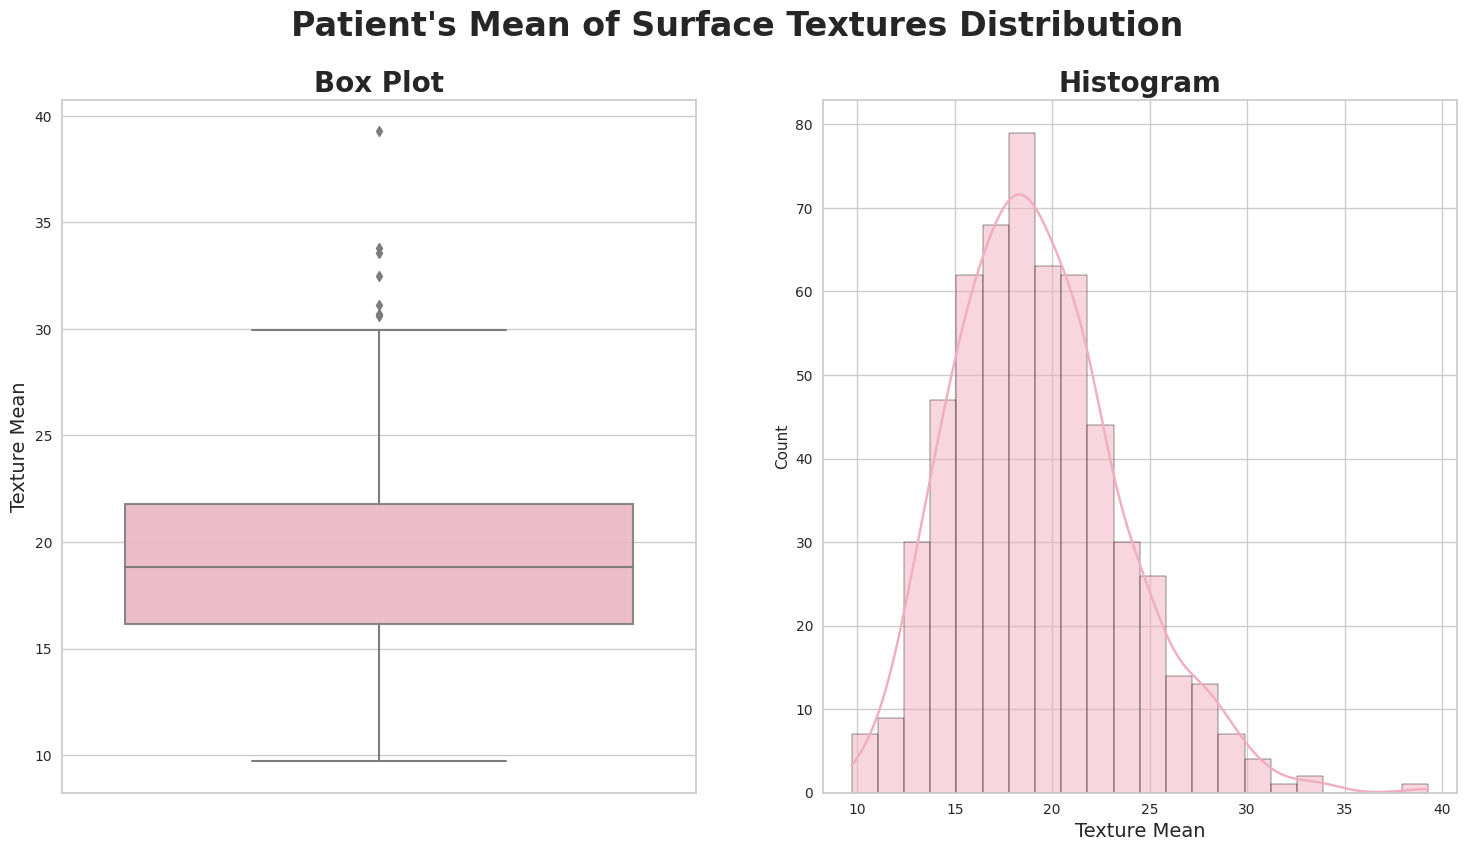

In [11]:
color = '#F2AEC1'
fig = plt.figure(figsize=(18,9))

fig.suptitle("Patient's Mean of Surface Textures Distribution", fontweight='heavy', fontsize='24')

ax1 = fig.add_subplot(1,2,1)
plt.title('Box Plot', fontweight='bold', fontsize='20')
sns.boxplot(data=df, y='texture_mean', color=color, boxprops=dict(alpha=0.9), linewidth=1.5)
plt.ylabel('Texture Mean', fontweight='medium', fontsize='14')

ax2 = fig.add_subplot(1,2,2)
plt.title('Histogram', fontweight='bold', fontsize='20')
sns.histplot(data=df, x='texture_mean', kde=True, color=color)
plt.xlabel('Texture Mean', fontweight='medium', fontsize='14')

plt.show()

In [12]:
# -- IQR Calculation --
q1 = np.percentile(df['texture_mean'], 25)
q3 = np.percentile(df['texture_mean'], 75)
iqr = q3 - q1

# -- Lower Limit Calculation --
ll = q1 - (1.5 * iqr)

# -- Upper Limit Calculation --
ul = q3 + (1.5 * iqr)

# -- Print --
print("Calculation result\n")
print("Inter Quartil Range\t: {:.3f}".format(iqr))
print("Lower Limit\t\t: {:.3f}".format(ll))
print("Upper Limit\t\t: {:.3f}".format(ul))

Calculation result

Inter Quartil Range	: 5.630
Lower Limit		: 7.725
Upper Limit		: 30.245


<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">From the calculation, we have an <b>Inter Quartile Range</b> value of <b><mark>5.630</mark></b>, a <b>Lower Limit</b> value of <b><mark>7.725</b></mark>, and an <b>Upper Limit</b> value of <b><mark>30.245</b></mark>. Also, it can be seen from the box plot, there are <b><mark>some outliers</b></mark> on the upper side of the data. The histogram also says that the data are <b><mark>left skewed</b></mark>.</div>

## <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">4.3 | perimeter_mean </div>
<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">
    Outer Perimeter of Lobes
</div>

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


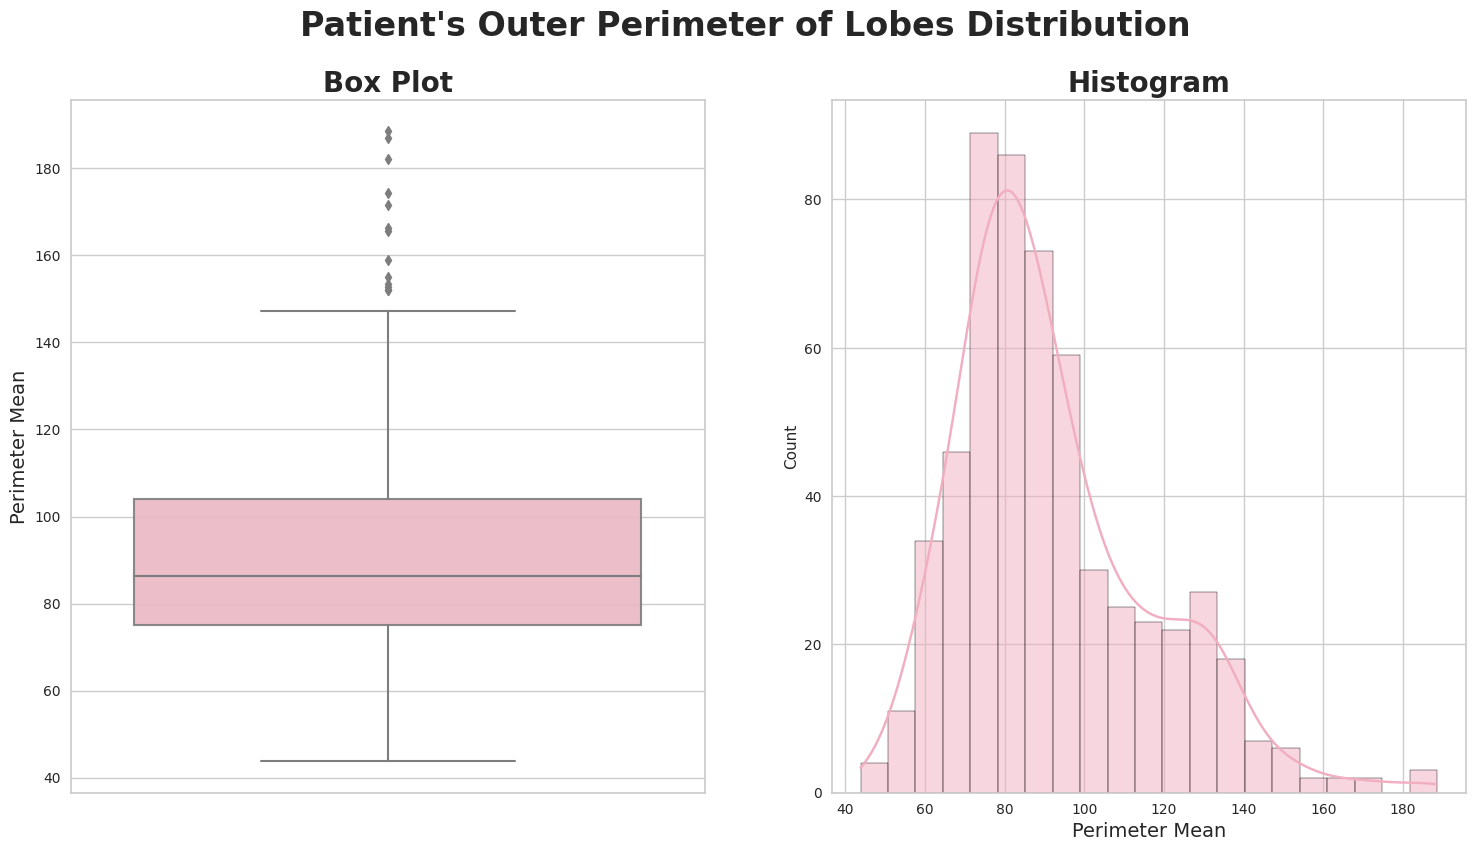

In [13]:
color = '#F2AEC1'
fig = plt.figure(figsize=(18,9))

fig.suptitle("Patient's Outer Perimeter of Lobes Distribution", fontweight='heavy', fontsize='24')

ax1 = fig.add_subplot(1,2,1)
plt.title('Box Plot', fontweight='bold', fontsize='20')
sns.boxplot(data=df, y='perimeter_mean', color=color, boxprops=dict(alpha=0.9), linewidth=1.5)
plt.ylabel('Perimeter Mean', fontweight='medium', fontsize='14')

ax2 = fig.add_subplot(1,2,2)
plt.title('Histogram', fontweight='bold', fontsize='20')
sns.histplot(data=df, x='perimeter_mean', kde=True, color=color)
plt.xlabel('Perimeter Mean', fontweight='medium', fontsize='14')

plt.show()

In [14]:
# -- IQR Calculation --
q1 = np.percentile(df['perimeter_mean'], 25)
q3 = np.percentile(df['perimeter_mean'], 75)
iqr = q3 - q1

# -- Lower Limit Calculation --
ll = q1 - (1.5 * iqr)

# -- Upper Limit Calculation --
ul = q3 + (1.5 * iqr)

# -- Print --
print("Calculation result\n")
print("Inter Quartil Range\t: {:.3f}".format(iqr))
print("Lower Limit\t\t: {:.3f}".format(ll))
print("Upper Limit\t\t: {:.3f}".format(ul))

Calculation result

Inter Quartil Range	: 28.930
Lower Limit		: 31.775
Upper Limit		: 147.495


<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">From the calculation, we have an <b>Inter Quartile Range</b> value of <b><mark>28.930</mark></b>, a <b>Lower Limit</b> value of <b><mark>31.779</b></mark>, and an <b>Upper Limit</b> value of <b><mark>147.495</b></mark>. Also, it can be seen from the box plot, there are <b><mark>some outliers</b></mark> on the upper side of the data. The histogram also says that the data are <b><mark>left skewed</b></mark>.</div>

## <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">4.4 | area_mean </div>
<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">
    Mean Area of Lobes
</div>

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


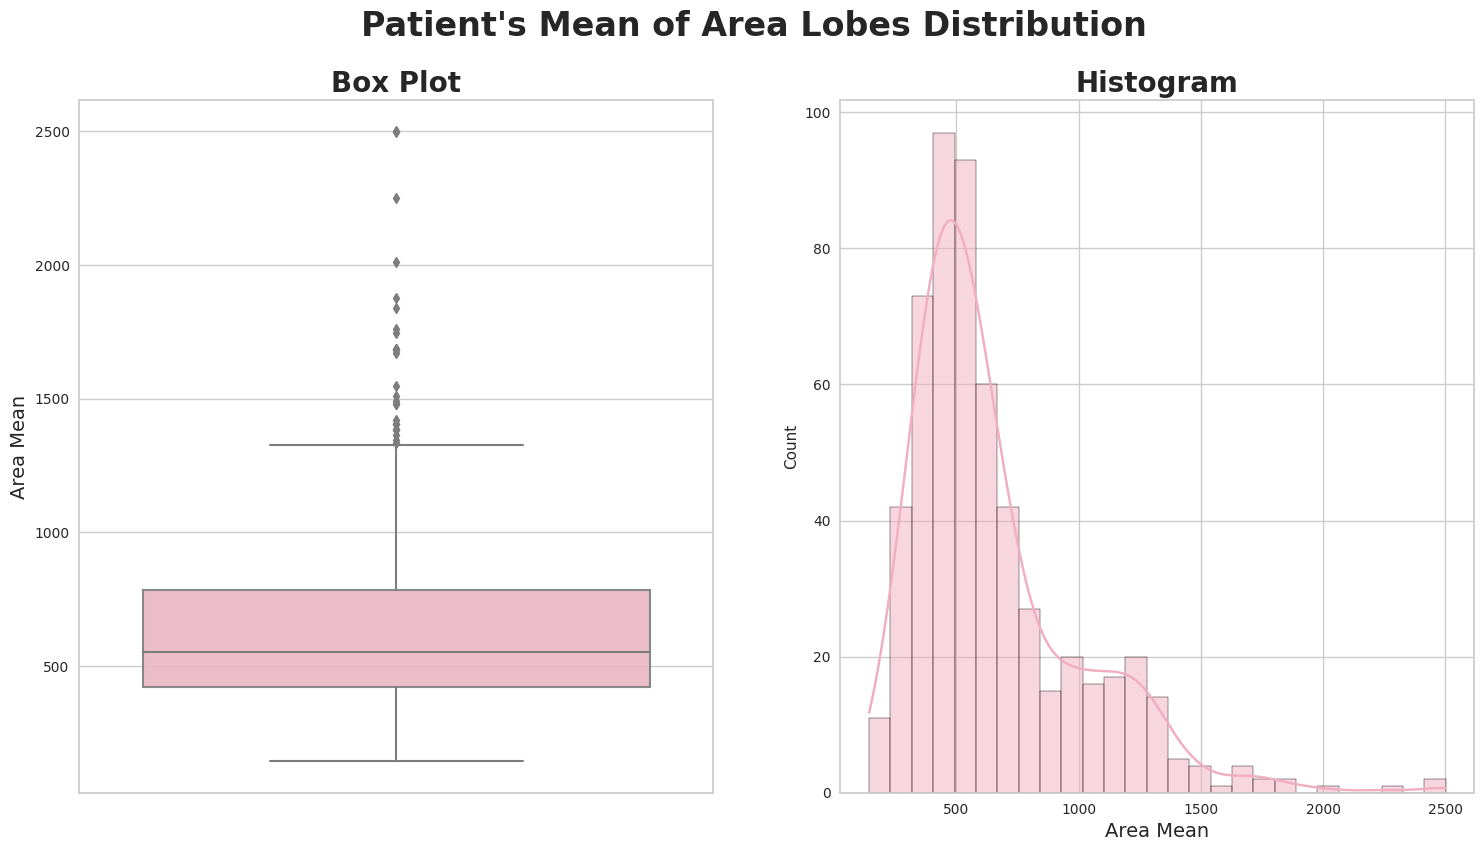

In [15]:
color = '#F2AEC1'
fig = plt.figure(figsize=(18,9))

fig.suptitle("Patient's Mean of Area Lobes Distribution", fontweight='heavy', fontsize='24')

ax1 = fig.add_subplot(1,2,1)
plt.title('Box Plot', fontweight='bold', fontsize='20')
sns.boxplot(data=df, y='area_mean', color=color, boxprops=dict(alpha=0.9), linewidth=1.5)
plt.ylabel('Area Mean', fontweight='medium', fontsize='14')

ax2 = fig.add_subplot(1,2,2)
plt.title('Histogram', fontweight='bold', fontsize='20')
sns.histplot(data=df, x='area_mean', kde=True, color=color)
plt.xlabel('Area Mean', fontweight='medium', fontsize='14')

plt.show()

In [16]:
# -- IQR Calculation --
q1 = np.percentile(df['area_mean'], 25)
q3 = np.percentile(df['area_mean'], 75)
iqr = q3 - q1

# -- Lower Limit Calculation --
ll = q1 - (1.5 * iqr)

# -- Upper Limit Calculation --
ul = q3 + (1.5 * iqr)

# -- Print --
print("Calculation result\n")
print("Inter Quartil Range\t: {:.3f}".format(iqr))
print("Lower Limit\t\t: {:.3f}".format(ll))
print("Upper Limit\t\t: {:.3f}".format(ul))

Calculation result

Inter Quartil Range	: 362.400
Lower Limit		: -123.300
Upper Limit		: 1326.300


<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">From the calculation, we have an <b>Inter Quartile Range</b> value of <b><mark>362.400</mark></b>, a <b>Lower Limit</b> value of <b><mark>-123.300</b></mark>, and an <b>Upper Limit</b> value of <b><mark>1,326.300</b></mark>. Also, it can be seen from the box plot, there are <b><mark>some outliers</b></mark> on the upper side of the data. The histogram also says that the data are <b><mark>left skewed</b></mark>.</div>

## <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">4.5 | smoothness_mean </div>
<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">
    Mean of Smoothness Levels
</div>

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


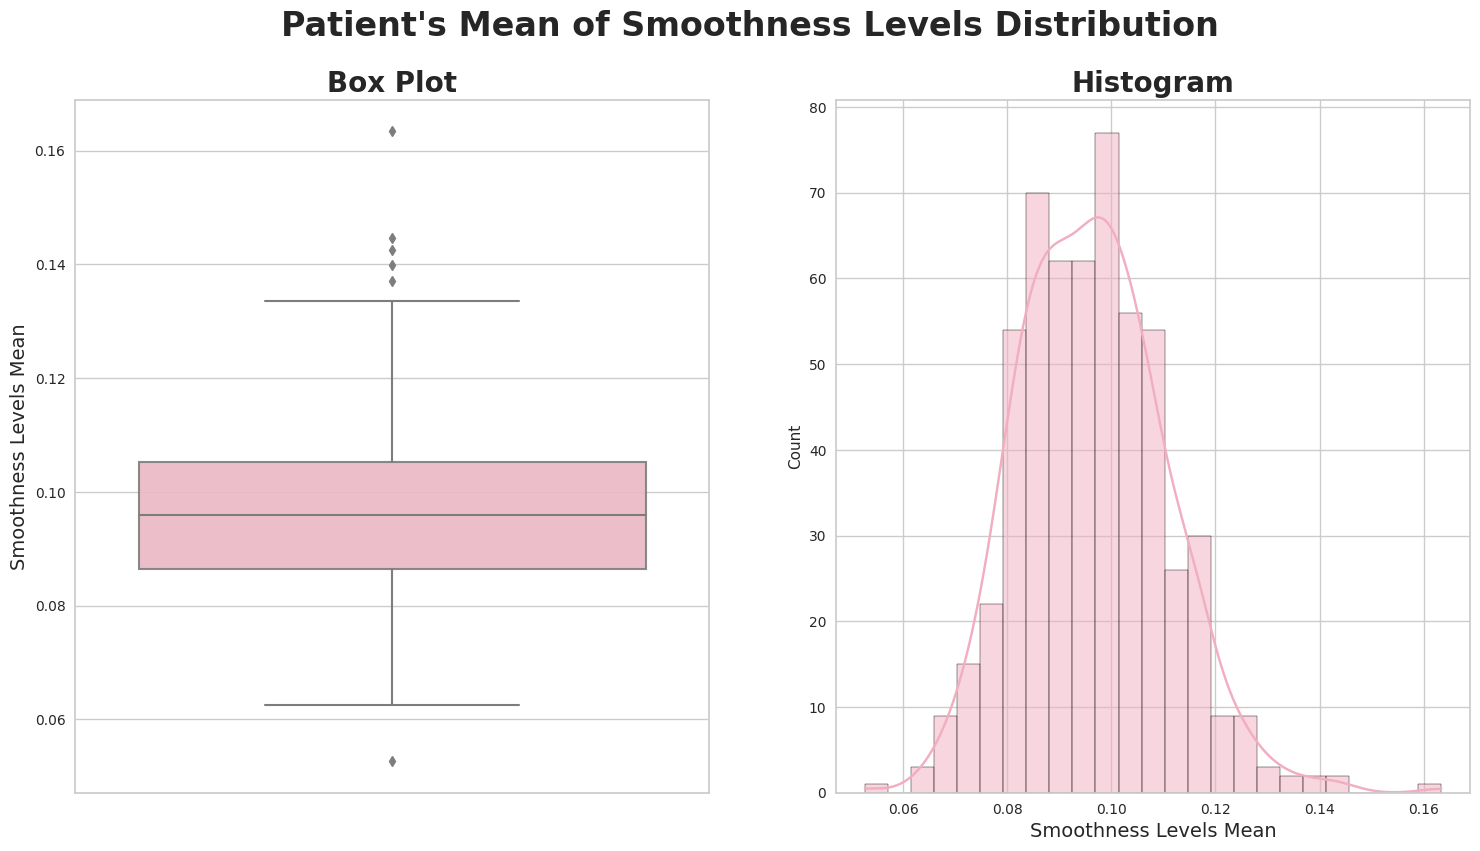

In [17]:
color = '#F2AEC1'
fig = plt.figure(figsize=(18,9))

fig.suptitle("Patient's Mean of Smoothness Levels Distribution", fontweight='heavy', fontsize='24')

ax1 = fig.add_subplot(1,2,1)
plt.title('Box Plot', fontweight='bold', fontsize='20')
sns.boxplot(data=df, y='smoothness_mean', color=color, boxprops=dict(alpha=0.9), linewidth=1.5)
plt.ylabel('Smoothness Levels Mean', fontweight='medium', fontsize='14')

ax2 = fig.add_subplot(1,2,2)
plt.title('Histogram', fontweight='bold', fontsize='20')
sns.histplot(data=df, x='smoothness_mean', kde=True, color=color)
plt.xlabel('Smoothness Levels Mean', fontweight='medium', fontsize='14')

plt.show()

In [18]:
# -- IQR Calculation --
q1 = np.percentile(df['smoothness_mean'], 25)
q3 = np.percentile(df['smoothness_mean'], 75)
iqr = q3 - q1

# -- Lower Limit Calculation --
ll = q1 - (1.5 * iqr)

# -- Upper Limit Calculation --
ul = q3 + (1.5 * iqr)

# -- Print --
print("Calculation result\n")
print("Inter Quartil Range\t: {:.3f}".format(iqr))
print("Lower Limit\t\t: {:.3f}".format(ll))
print("Upper Limit\t\t: {:.3f}".format(ul))

Calculation result

Inter Quartil Range	: 0.019
Lower Limit		: 0.058
Upper Limit		: 0.134


<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">From the calculation, we have an <b>Inter Quartile Range</b> value of <b><mark>0.019</mark></b>, a <b>Lower Limit</b> value of <b><mark>0.058</b></mark>, and an <b>Upper Limit</b> value of <b><mark>0.134</b></mark>. Also, it can be seen from the box plot, there are <b><mark>some outliers</b></mark> on the upper side and <b><mark>one outlier</b></mark> on the lower side of the data. The histogram also says that the data are <b><mark>left skewed</b></mark>.</div>

## <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">4.6 | compactness_mean </div>
<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">
    Mean of Compactness
</div>

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


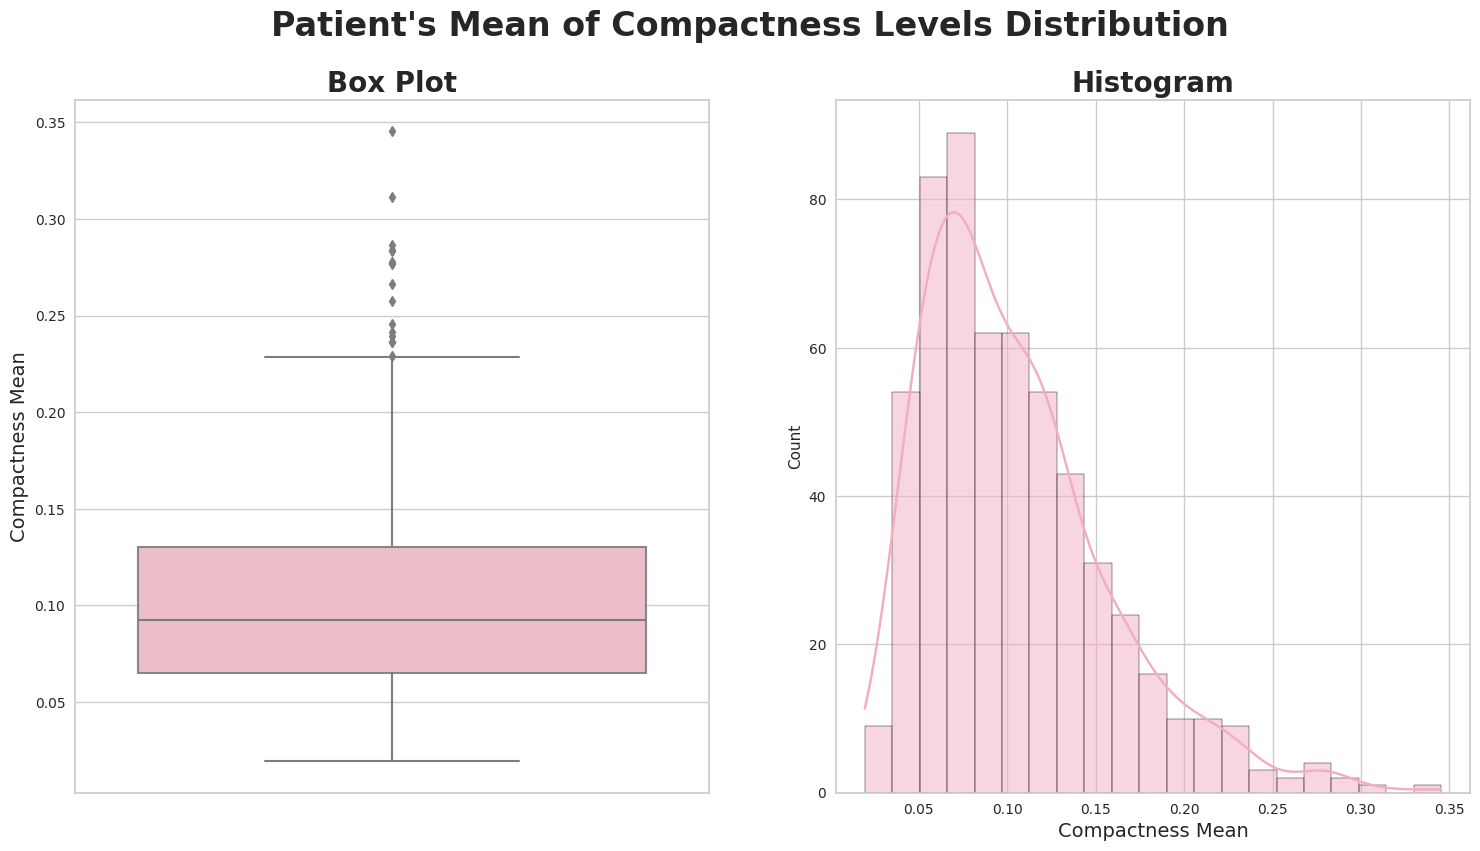

In [19]:
color = '#F2AEC1'
fig = plt.figure(figsize=(18,9))

fig.suptitle("Patient's Mean of Compactness Levels Distribution", fontweight='heavy', fontsize='24')

ax1 = fig.add_subplot(1,2,1)
plt.title('Box Plot', fontweight='bold', fontsize='20')
sns.boxplot(data=df, y='compactness_mean', color=color, boxprops=dict(alpha=0.9), linewidth=1.5)
plt.ylabel('Compactness Mean', fontweight='medium', fontsize='14')

ax2 = fig.add_subplot(1,2,2)
plt.title('Histogram', fontweight='bold', fontsize='20')
sns.histplot(data=df, x='compactness_mean', kde=True, color=color)
plt.xlabel('Compactness Mean', fontweight='medium', fontsize='14')

plt.show()

In [20]:
# -- IQR Calculation --
q1 = np.percentile(df['compactness_mean'], 25)
q3 = np.percentile(df['compactness_mean'], 75)
iqr = q3 - q1

# -- Lower Limit Calculation --
ll = q1 - (1.5 * iqr)

# -- Upper Limit Calculation --
ul = q3 + (1.5 * iqr)

# -- Print --
print("Calculation result\n")
print("Inter Quartil Range\t: {:.3f}".format(iqr))
print("Lower Limit\t\t: {:.3f}".format(ll))
print("Upper Limit\t\t: {:.3f}".format(ul))

Calculation result

Inter Quartil Range	: 0.065
Lower Limit		: -0.033
Upper Limit		: 0.229


<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">From the calculation, we have an <b>Inter Quartile Range</b> value of <b><mark>0.065</mark></b>, a <b>Lower Limit</b> value of <b><mark>-0.033</b></mark>, and an <b>Upper Limit</b> value of <b><mark>0.229</b></mark>. Also, it can be seen from the box plot, there are <b><mark>some outliers</b></mark> on the upper side of the data. The histogram also says that the data are <b><mark>left skewed</b></mark>.</div>

## <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">4.7 | concavity_mean </div>
<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">
    Mean of Concavity
</div>

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


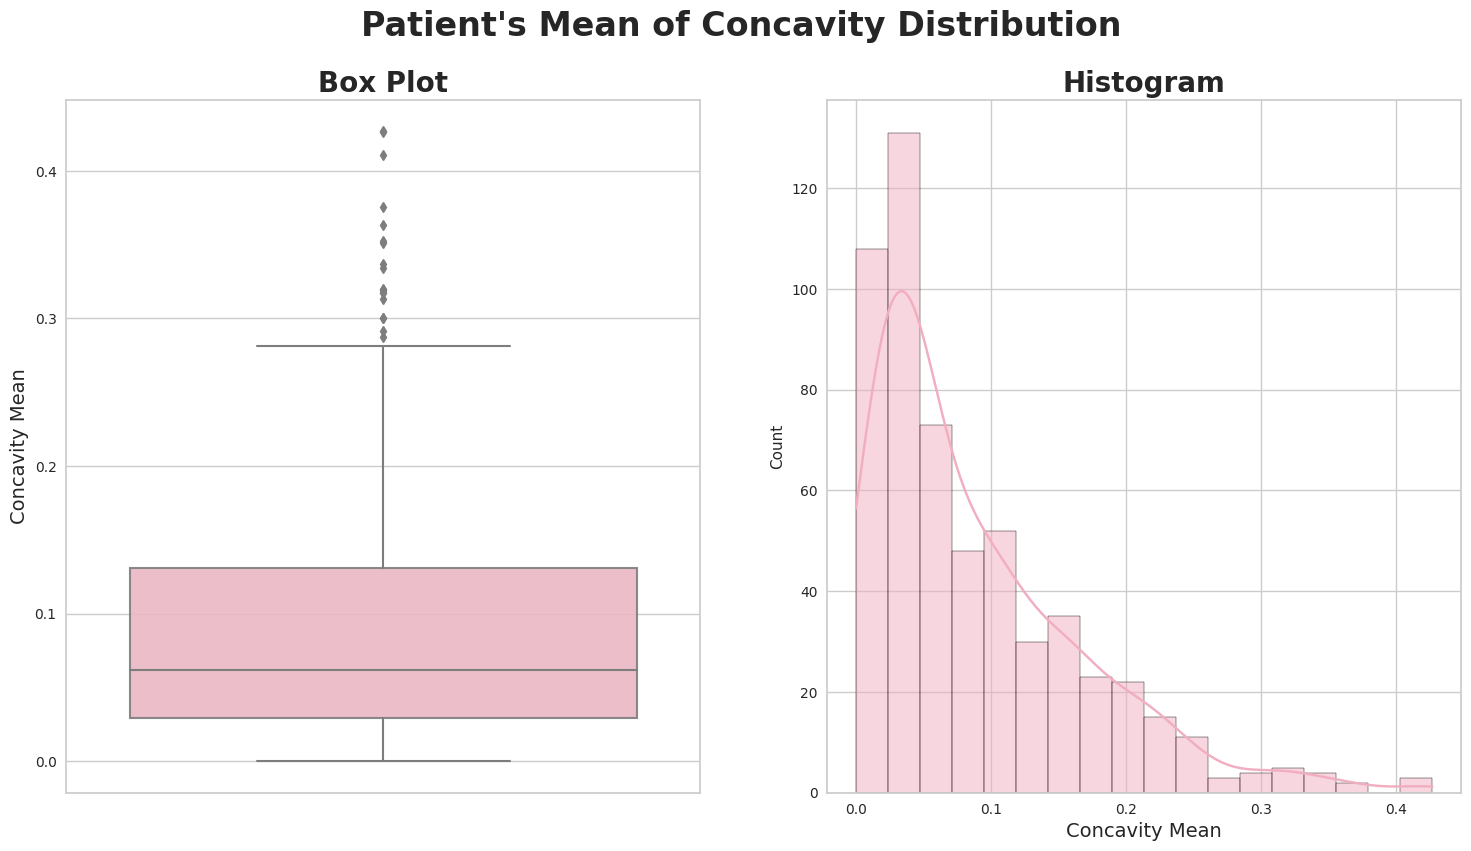

In [21]:
color = '#F2AEC1'
fig = plt.figure(figsize=(18,9))

fig.suptitle("Patient's Mean of Concavity Distribution", fontweight='heavy', fontsize='24')

ax1 = fig.add_subplot(1,2,1)
plt.title('Box Plot', fontweight='bold', fontsize='20')
sns.boxplot(data=df, y='concavity_mean', color=color, boxprops=dict(alpha=0.9), linewidth=1.5)
plt.ylabel('Concavity Mean', fontweight='medium', fontsize='14')

ax2 = fig.add_subplot(1,2,2)
plt.title('Histogram', fontweight='bold', fontsize='20')
sns.histplot(data=df, x='concavity_mean', kde=True, color=color)
plt.xlabel('Concavity Mean', fontweight='medium', fontsize='14')

plt.show()

In [22]:
# -- IQR Calculation --
q1 = np.percentile(df['concavity_mean'], 25)
q3 = np.percentile(df['concavity_mean'], 75)
iqr = q3 - q1

# -- Lower Limit Calculation --
ll = q1 - (1.5 * iqr)

# -- Upper Limit Calculation --
ul = q3 + (1.5 * iqr)

# -- Print --
print("Calculation result\n")
print("Inter Quartil Range\t: {:.3f}".format(iqr))
print("Lower Limit\t\t: {:.3f}".format(ll))
print("Upper Limit\t\t: {:.3f}".format(ul))

Calculation result

Inter Quartil Range	: 0.101
Lower Limit		: -0.122
Upper Limit		: 0.282


<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">From the calculation, we have an <b>Inter Quartile Range</b> value of <b><mark>0.101</mark></b>, a <b>Lower Limit</b> value of <b><mark>-0.122</b></mark>, and an <b>Upper Limit</b> value of <b><mark>0.282</b></mark>. Also, it can be seen from the box plot, there are <b><mark>some outliers</b></mark> on the upper side of the data. The histogram also says that the data are <b><mark>left skewed</b></mark>.</div>

## <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">4.8 | concave_points_mean </div>
<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">
    Mean of Concave Points
</div>

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


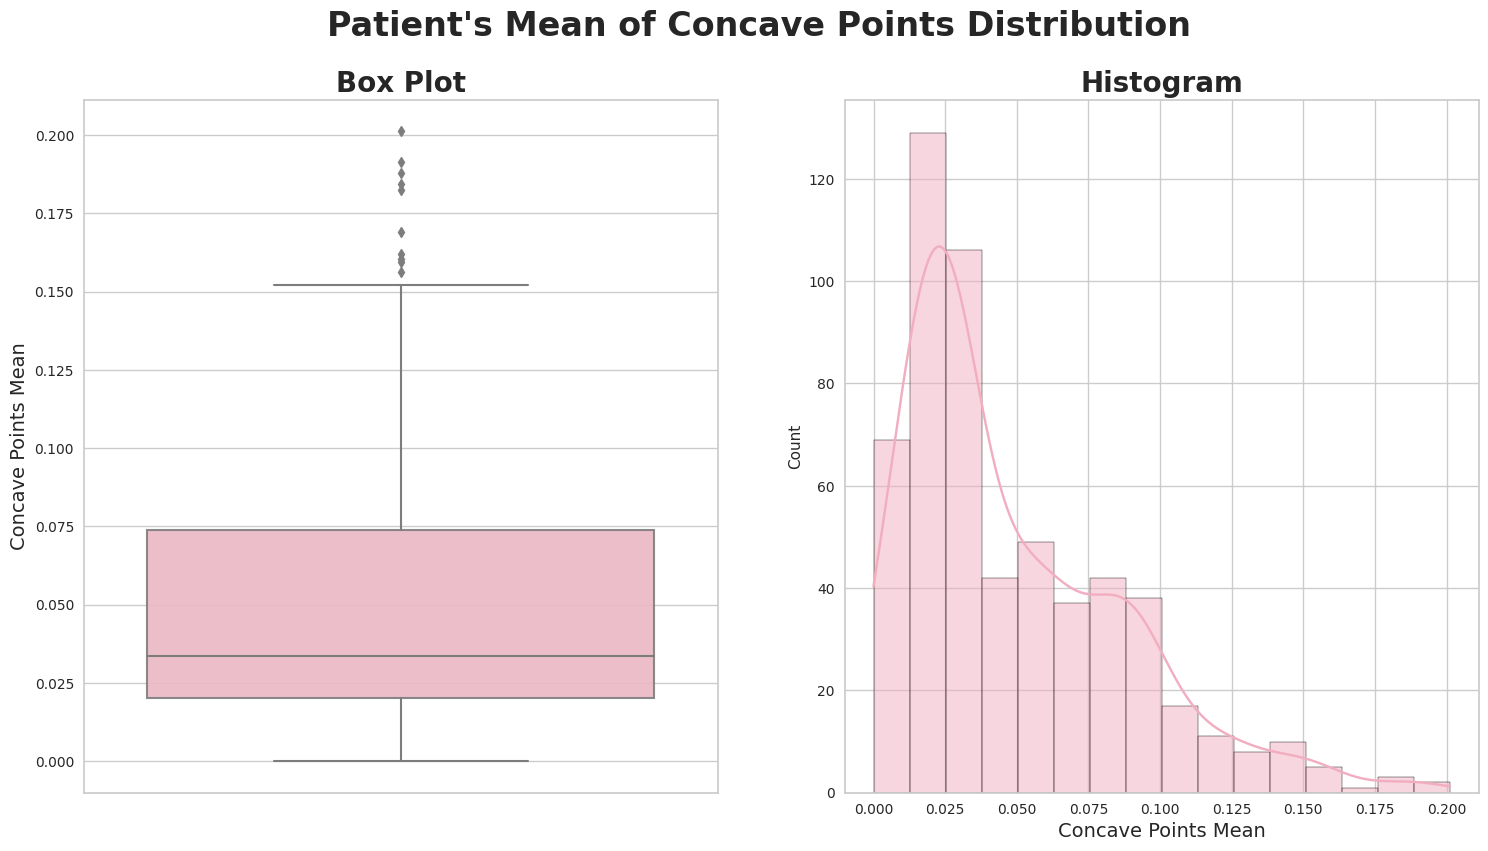

In [23]:
color = '#F2AEC1'
fig = plt.figure(figsize=(18,9))

fig.suptitle("Patient's Mean of Concave Points Distribution", fontweight='heavy', fontsize='24')

ax1 = fig.add_subplot(1,2,1)
plt.title('Box Plot', fontweight='bold', fontsize='20')
sns.boxplot(data=df, y='concave_points_mean', color=color, boxprops=dict(alpha=0.9), linewidth=1.5)
plt.ylabel('Concave Points Mean', fontweight='medium', fontsize='14')

ax2 = fig.add_subplot(1,2,2)
plt.title('Histogram', fontweight='bold', fontsize='20')
sns.histplot(data=df, x='concave_points_mean', kde=True, color=color)
plt.xlabel('Concave Points Mean', fontweight='medium', fontsize='14')

plt.show()

In [24]:
# -- IQR Calculation --
q1 = np.percentile(df['concave_points_mean'], 25)
q3 = np.percentile(df['concave_points_mean'], 75)
iqr = q3 - q1

# -- Lower Limit Calculation --
ll = q1 - (1.5 * iqr)

# -- Upper Limit Calculation --
ul = q3 + (1.5 * iqr)

# -- Print --
print("Calculation result\n")
print("Inter Quartil Range\t: {:.3f}".format(iqr))
print("Lower Limit\t\t: {:.3f}".format(ll))
print("Upper Limit\t\t: {:.3f}".format(ul))

Calculation result

Inter Quartil Range	: 0.054
Lower Limit		: -0.060
Upper Limit		: 0.155


<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">From the calculation, we have an <b>Inter Quartile Range</b> value of <b><mark>0.054</mark></b>, a <b>Lower Limit</b> value of <b><mark>-0.060</b></mark>, and an <b>Upper Limit</b> value of <b><mark>0.155</b></mark>. Also, it can be seen from the box plot, there are <b><mark>some outliers</b></mark> on the upper side of the data. The histogram also says that the data are <b><mark>left skewed</b></mark>.</div>

## <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">4.9 | symmetry_mean </div>
<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">
    Mean of Symmetry
</div>

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


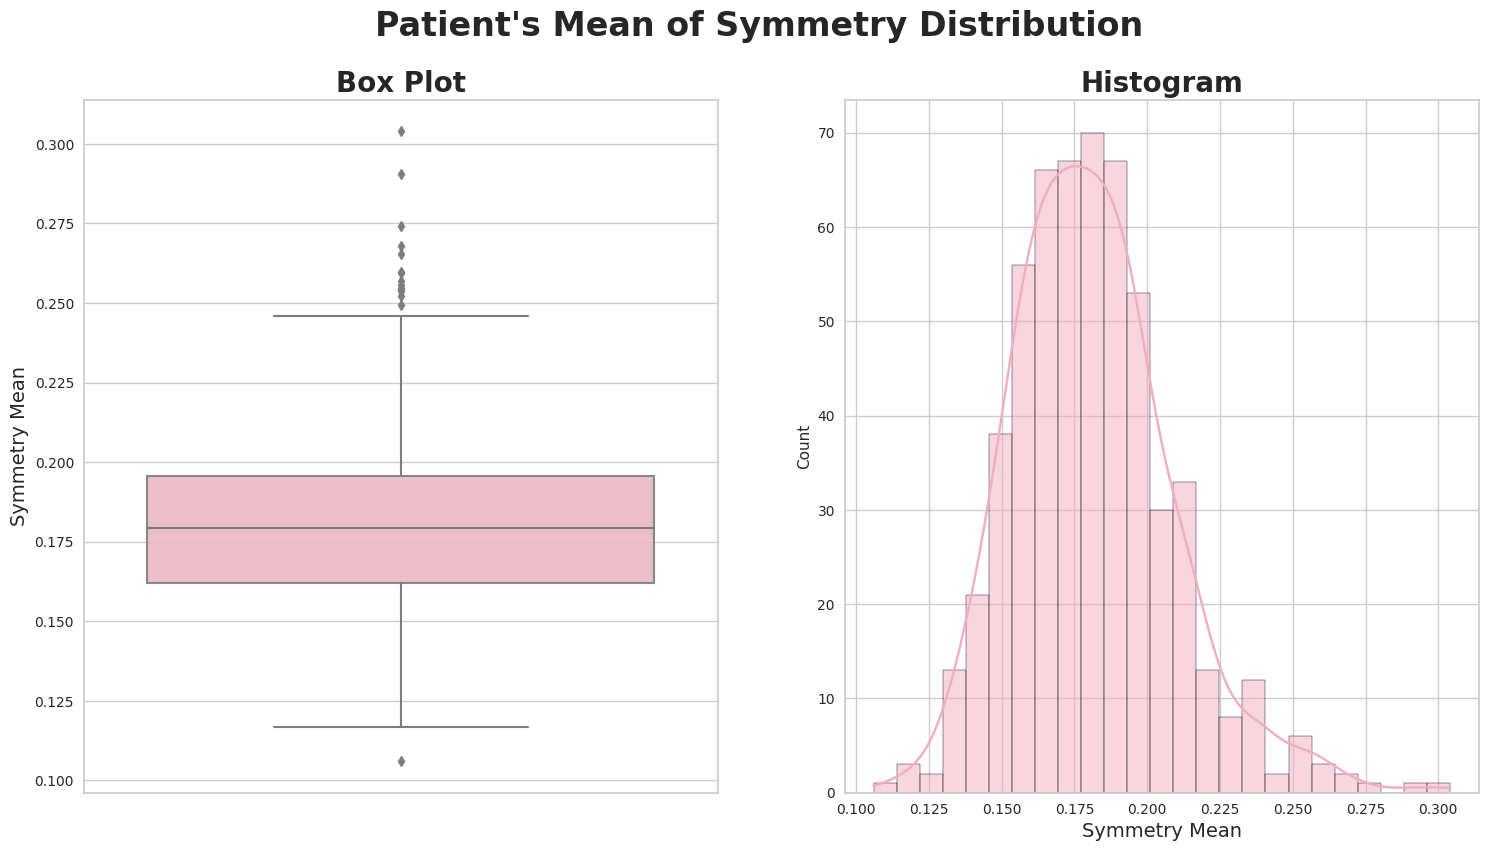

In [25]:
color = '#F2AEC1'
fig = plt.figure(figsize=(18,9))

fig.suptitle("Patient's Mean of Symmetry Distribution", fontweight='heavy', fontsize='24')

ax1 = fig.add_subplot(1,2,1)
plt.title('Box Plot', fontweight='bold', fontsize='20')
sns.boxplot(data=df, y='symmetry_mean', color=color, boxprops=dict(alpha=0.9), linewidth=1.5)
plt.ylabel('Symmetry Mean', fontweight='medium', fontsize='14')

ax2 = fig.add_subplot(1,2,2)
plt.title('Histogram', fontweight='bold', fontsize='20')
sns.histplot(data=df, x='symmetry_mean', kde=True, color=color)
plt.xlabel('Symmetry Mean', fontweight='medium', fontsize='14')

plt.show()

In [26]:
# -- IQR Calculation --
q1 = np.percentile(df['symmetry_mean'], 25)
q3 = np.percentile(df['symmetry_mean'], 75)
iqr = q3 - q1

# -- Lower Limit Calculation --
ll = q1 - (1.5 * iqr)

# -- Upper Limit Calculation --
ul = q3 + (1.5 * iqr)

# -- Print --
print("Calculation result\n")
print("Inter Quartil Range\t: {:.3f}".format(iqr))
print("Lower Limit\t\t: {:.3f}".format(ll))
print("Upper Limit\t\t: {:.3f}".format(ul))

Calculation result

Inter Quartil Range	: 0.034
Lower Limit		: 0.111
Upper Limit		: 0.246


<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">From the calculation, we have an <b>Inter Quartile Range</b> value of <b><mark>0.034</mark></b>, a <b>Lower Limit</b> value of <b><mark>0.111</b></mark>, and an <b>Upper Limit</b> value of <b><mark>0.246</b></mark>. Also, it can be seen from the box plot, there are <b><mark>some outliers</b></mark> on the upper side and <b><mark>one outlier</b></mark> on the lower side of the data. The histogram also says that the data are <b><mark>left skewed</b></mark>.</div>

## <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">4.10 | fractal_dimension_mean </div>
<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">
    Mean of Fractal Dimension
</div>

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


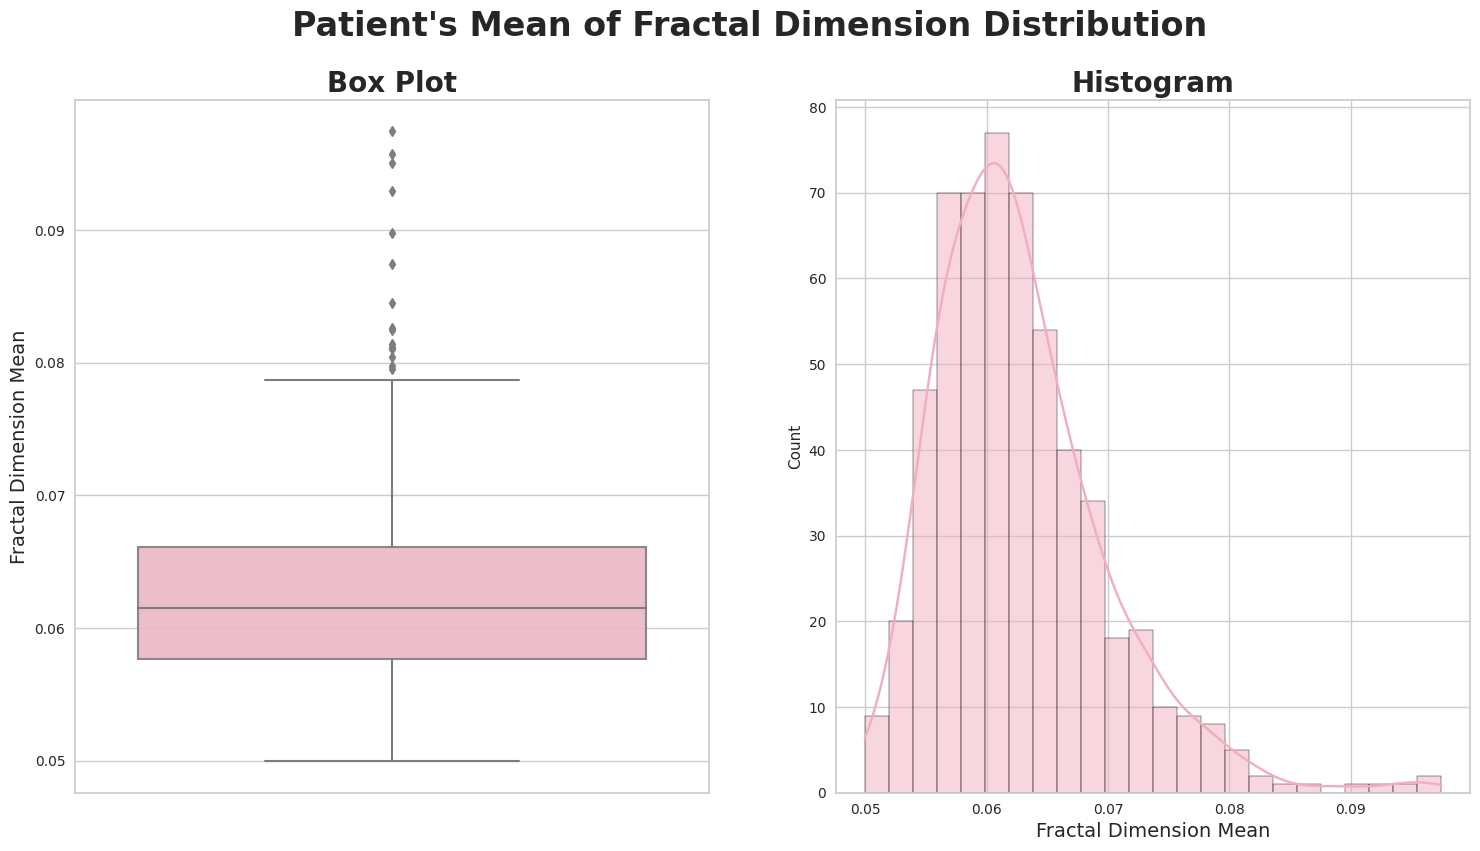

In [27]:
color = '#F2AEC1'
fig = plt.figure(figsize=(18,9))

fig.suptitle("Patient's Mean of Fractal Dimension Distribution", fontweight='heavy', fontsize='24')

ax1 = fig.add_subplot(1,2,1)
plt.title('Box Plot', fontweight='bold', fontsize='20')
sns.boxplot(data=df, y='fractal_dimension_mean', color=color, boxprops=dict(alpha=0.9), linewidth=1.5)
plt.ylabel('Fractal Dimension Mean', fontweight='medium', fontsize='14')

ax2 = fig.add_subplot(1,2,2)
plt.title('Histogram', fontweight='bold', fontsize='20')
sns.histplot(data=df, x='fractal_dimension_mean', kde=True, color=color)
plt.xlabel('Fractal Dimension Mean', fontweight='medium', fontsize='14')

plt.show()

In [28]:
# -- IQR Calculation --
q1 = np.percentile(df['fractal_dimension_mean'], 25)
q3 = np.percentile(df['fractal_dimension_mean'], 75)
iqr = q3 - q1

# -- Lower Limit Calculation --
ll = q1 - (1.5 * iqr)

# -- Upper Limit Calculation --
ul = q3 + (1.5 * iqr)

# -- Print --
print("Calculation result\n")
print("Inter Quartil Range\t: {:.3f}".format(iqr))
print("Lower Limit\t\t: {:.3f}".format(ll))
print("Upper Limit\t\t: {:.3f}".format(ul))

Calculation result

Inter Quartil Range	: 0.008
Lower Limit		: 0.045
Upper Limit		: 0.079


<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">From the calculation, we have an <b>Inter Quartile Range</b> value of <b><mark>0.008</mark></b>, a <b>Lower Limit</b> value of <b><mark>0.045</b></mark>, and an <b>Upper Limit</b> value of <b><mark>0.079</b></mark>. Also, it can be seen from the box plot, there are <b><mark>some outliers</b></mark> on the upper side of the data. The histogram also says that the data are <b><mark>left skewed</b></mark>.</div>

## <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">4.11 | radius_se </div>
<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">
    SE of Radius
</div>

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


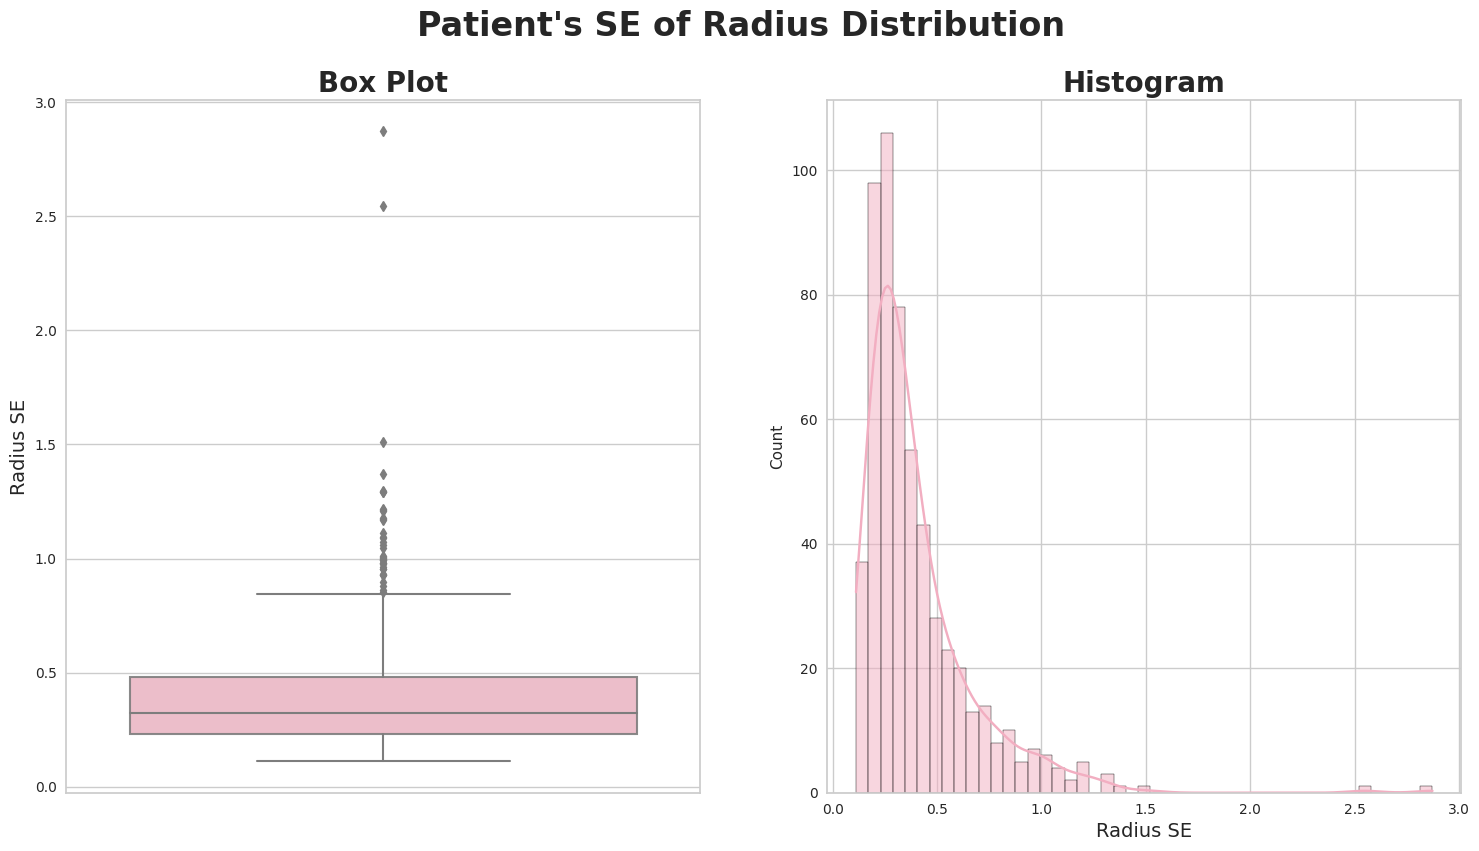

In [29]:
color = '#F2AEC1'
fig = plt.figure(figsize=(18,9))

fig.suptitle("Patient's SE of Radius Distribution", fontweight='heavy', fontsize='24')

ax1 = fig.add_subplot(1,2,1)
plt.title('Box Plot', fontweight='bold', fontsize='20')
sns.boxplot(data=df, y='radius_se', color=color, boxprops=dict(alpha=0.9), linewidth=1.5)
plt.ylabel('Radius SE', fontweight='medium', fontsize='14')

ax2 = fig.add_subplot(1,2,2)
plt.title('Histogram', fontweight='bold', fontsize='20')
sns.histplot(data=df, x='radius_se', kde=True, color=color)
plt.xlabel('Radius SE', fontweight='medium', fontsize='14')

plt.show()

In [30]:
# -- IQR Calculation --
q1 = np.percentile(df['radius_se'], 25)
q3 = np.percentile(df['radius_se'], 75)
iqr = q3 - q1

# -- Lower Limit Calculation --
ll = q1 - (1.5 * iqr)

# -- Upper Limit Calculation --
ul = q3 + (1.5 * iqr)

# -- Print --
print("Calculation result\n")
print("Inter Quartil Range\t: {:.3f}".format(iqr))
print("Lower Limit\t\t: {:.3f}".format(ll))
print("Upper Limit\t\t: {:.3f}".format(ul))

Calculation result

Inter Quartil Range	: 0.246
Lower Limit		: -0.137
Upper Limit		: 0.849


<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">From the calculation, we have an <b>Inter Quartile Range</b> value of <b><mark>0.246</mark></b>, a <b>Lower Limit</b> value of <b><mark>-0.137</b></mark>, and an <b>Upper Limit</b> value of <b><mark>0.849</b></mark>. Also, it can be seen from the box plot, there are <b><mark>some outliers</b></mark> on the upper side of the data. The histogram also says that the data are <b><mark>left skewed</b></mark>.</div>

## <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">4.12 | texture_se </div>
<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">
    SE of Texture
</div>

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


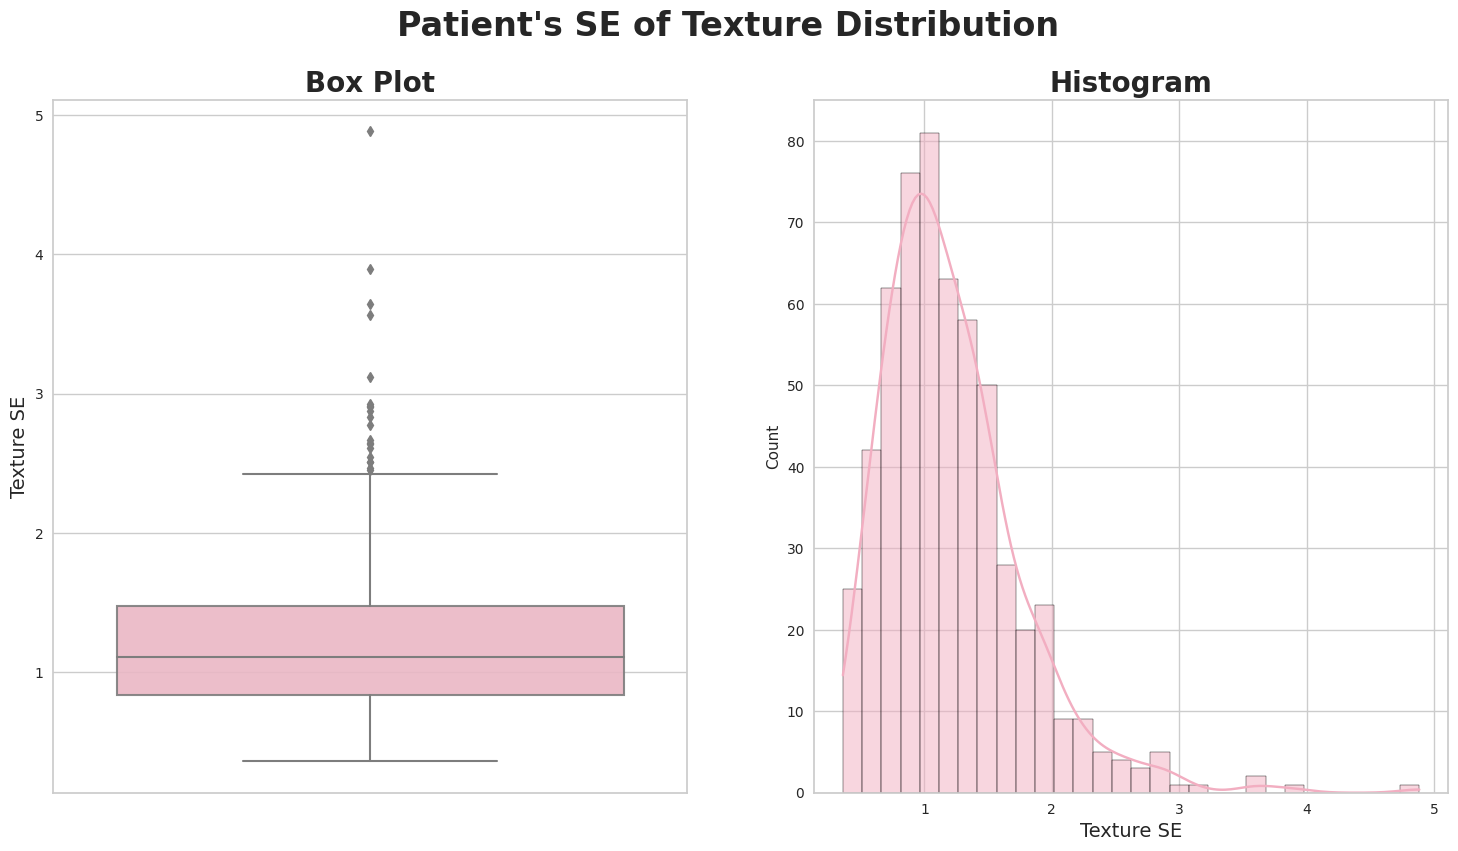

In [31]:
color = '#F2AEC1'
fig = plt.figure(figsize=(18,9))

fig.suptitle("Patient's SE of Texture Distribution", fontweight='heavy', fontsize='24')

ax1 = fig.add_subplot(1,2,1)
plt.title('Box Plot', fontweight='bold', fontsize='20')
sns.boxplot(data=df, y='texture_se', color=color, boxprops=dict(alpha=0.9), linewidth=1.5)
plt.ylabel('Texture SE', fontweight='medium', fontsize='14')

ax2 = fig.add_subplot(1,2,2)
plt.title('Histogram', fontweight='bold', fontsize='20')
sns.histplot(data=df, x='texture_se', kde=True, color=color)
plt.xlabel('Texture SE', fontweight='medium', fontsize='14')

plt.show()

In [32]:
# -- IQR Calculation --
q1 = np.percentile(df['texture_se'], 25)
q3 = np.percentile(df['texture_se'], 75)
iqr = q3 - q1

# -- Lower Limit Calculation --
ll = q1 - (1.5 * iqr)

# -- Upper Limit Calculation --
ul = q3 + (1.5 * iqr)

# -- Print --
print("Calculation result\n")
print("Inter Quartil Range\t: {:.3f}".format(iqr))
print("Lower Limit\t\t: {:.3f}".format(ll))
print("Upper Limit\t\t: {:.3f}".format(ul))

Calculation result

Inter Quartil Range	: 0.640
Lower Limit		: -0.126
Upper Limit		: 2.434


<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">From the calculation, we have an <b>Inter Quartile Range</b> value of <b><mark>0.640</mark></b>, a <b>Lower Limit</b> value of <b><mark>-0.126</b></mark>, and an <b>Upper Limit</b> value of <b><mark>2.434</b></mark>. Also, it can be seen from the box plot, there are <b><mark>some outliers</b></mark> on the upper side of the data. The histogram also says that the data are <b><mark>left skewed</b></mark>.</div>

## <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">4.13 | perimeter_se </div>
<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">
    Perimeter of SE
</div>

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


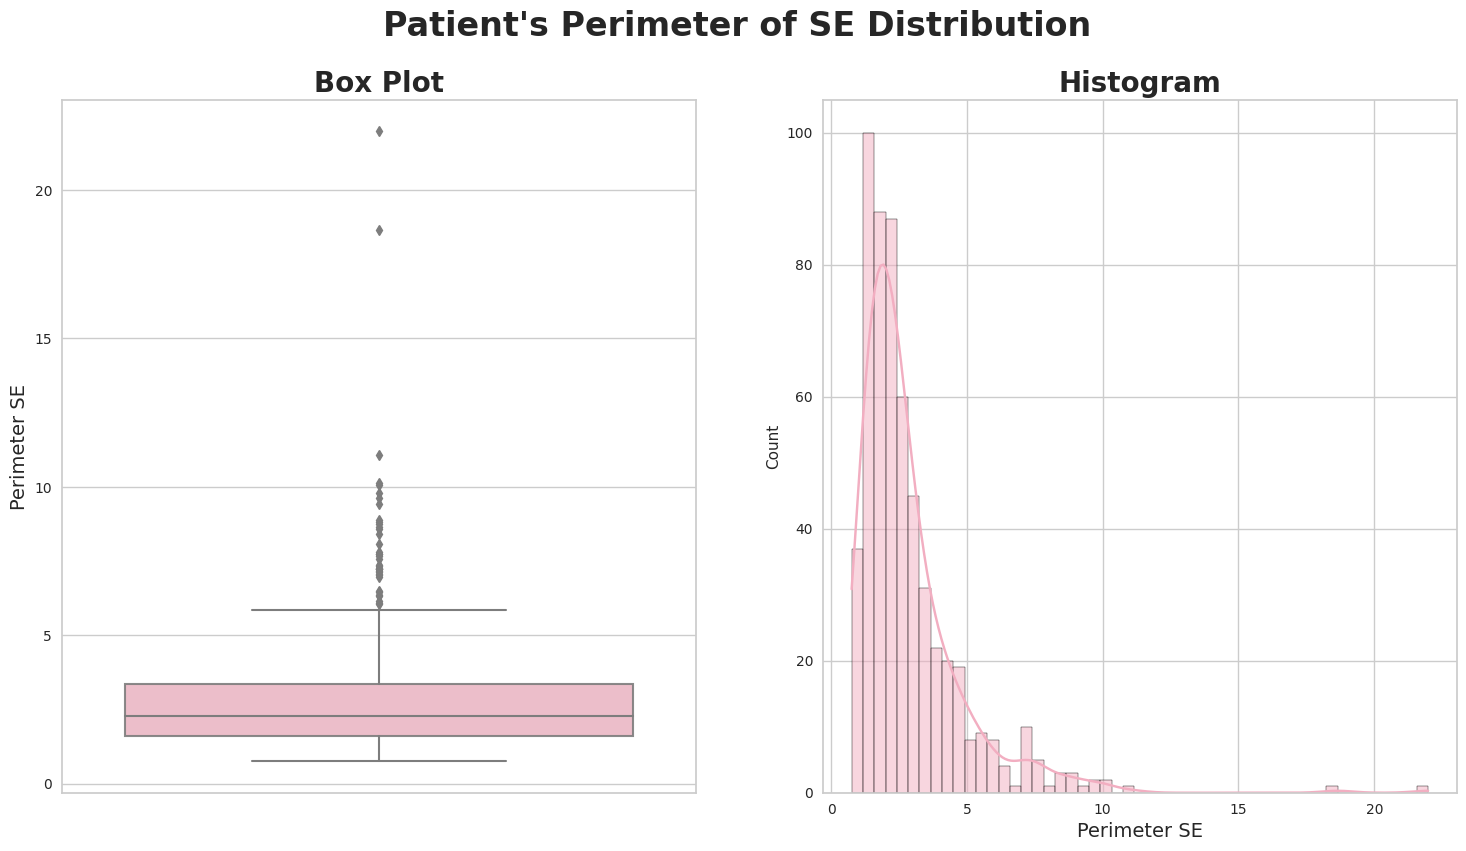

In [33]:
color = '#F2AEC1'
fig = plt.figure(figsize=(18,9))

fig.suptitle("Patient's Perimeter of SE Distribution", fontweight='heavy', fontsize='24')

ax1 = fig.add_subplot(1,2,1)
plt.title('Box Plot', fontweight='bold', fontsize='20')
sns.boxplot(data=df, y='perimeter_se', color=color, boxprops=dict(alpha=0.9), linewidth=1.5)
plt.ylabel('Perimeter SE', fontweight='medium', fontsize='14')

ax2 = fig.add_subplot(1,2,2)
plt.title('Histogram', fontweight='bold', fontsize='20')
sns.histplot(data=df, x='perimeter_se', kde=True, color=color)
plt.xlabel('Perimeter SE', fontweight='medium', fontsize='14')

plt.show()

In [34]:
# -- IQR Calculation --
q1 = np.percentile(df['perimeter_se'], 25)
q3 = np.percentile(df['perimeter_se'], 75)
iqr = q3 - q1

# -- Lower Limit Calculation --
ll = q1 - (1.5 * iqr)

# -- Upper Limit Calculation --
ul = q3 + (1.5 * iqr)

# -- Print --
print("Calculation result\n")
print("Inter Quartil Range\t: {:.3f}".format(iqr))
print("Lower Limit\t\t: {:.3f}".format(ll))
print("Upper Limit\t\t: {:.3f}".format(ul))

Calculation result

Inter Quartil Range	: 1.751
Lower Limit		: -1.020
Upper Limit		: 5.984


<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">From the calculation, we have an <b>Inter Quartile Range</b> value of <b><mark>1.751</mark></b>, a <b>Lower Limit</b> value of <b><mark>-1.020</b></mark>, and an <b>Upper Limit</b> value of <b><mark>5.984</b></mark>. Also, it can be seen from the box plot, there are <b><mark>some outliers</b></mark> on the upper side of the data. The histogram also says that the data are <b><mark>left skewed</b></mark>.</div>

## <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">4.14 | area_se </div>
<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">
    Area of SE
</div>

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


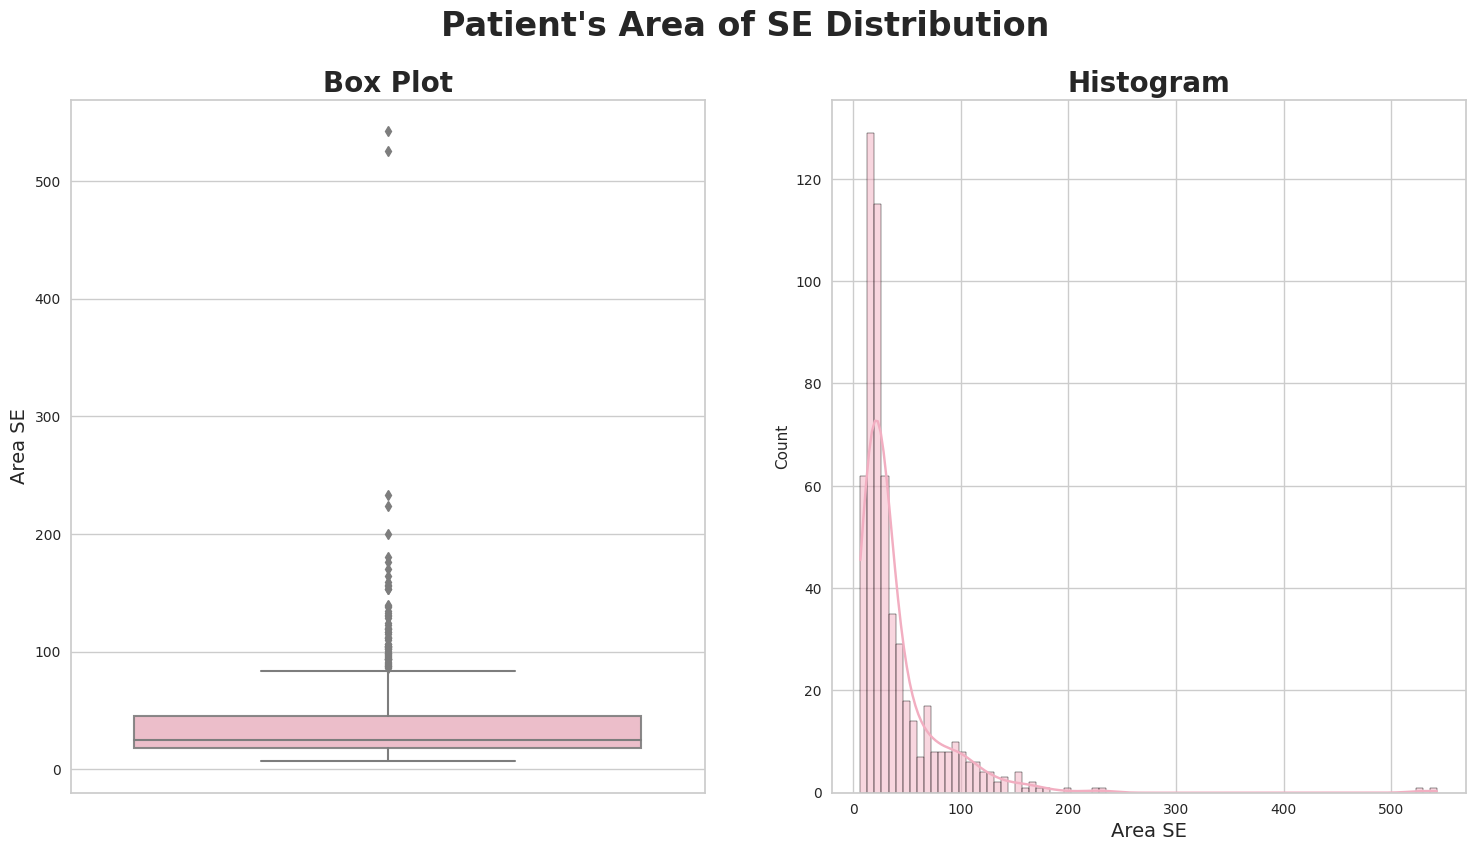

In [35]:
color = '#F2AEC1'
fig = plt.figure(figsize=(18,9))

fig.suptitle("Patient's Area of SE Distribution", fontweight='heavy', fontsize='24')

ax1 = fig.add_subplot(1,2,1)
plt.title('Box Plot', fontweight='bold', fontsize='20')
sns.boxplot(data=df, y='area_se', color=color, boxprops=dict(alpha=0.9), linewidth=1.5)
plt.ylabel('Area SE', fontweight='medium', fontsize='14')

ax2 = fig.add_subplot(1,2,2)
plt.title('Histogram', fontweight='bold', fontsize='20')
sns.histplot(data=df, x='area_se', kde=True, color=color)
plt.xlabel('Area SE', fontweight='medium', fontsize='14')

plt.show()

In [36]:
# -- IQR Calculation --
q1 = np.percentile(df['area_se'], 25)
q3 = np.percentile(df['area_se'], 75)
iqr = q3 - q1

# -- Lower Limit Calculation --
ll = q1 - (1.5 * iqr)

# -- Upper Limit Calculation --
ul = q3 + (1.5 * iqr)

# -- Print --
print("Calculation result\n")
print("Inter Quartil Range\t: {:.3f}".format(iqr))
print("Lower Limit\t\t: {:.3f}".format(ll))
print("Upper Limit\t\t: {:.3f}".format(ul))

Calculation result

Inter Quartil Range	: 27.340
Lower Limit		: -23.160
Upper Limit		: 86.200


<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">From the calculation, we have an <b>Inter Quartile Range</b> value of <b><mark>27.340</mark></b>, a <b>Lower Limit</b> value of <b><mark>-23.160</b></mark>, and an <b>Upper Limit</b> value of <b><mark>86.200</b></mark>. Also, it can be seen from the box plot, there are <b><mark>some outliers</b></mark> on the upper side of the data. The histogram also says that the data are <b><mark>left skewed</b></mark>.</div>

## <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">4.15 | smoothness_se </div>
<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">
    SE of Smoothness
</div>

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


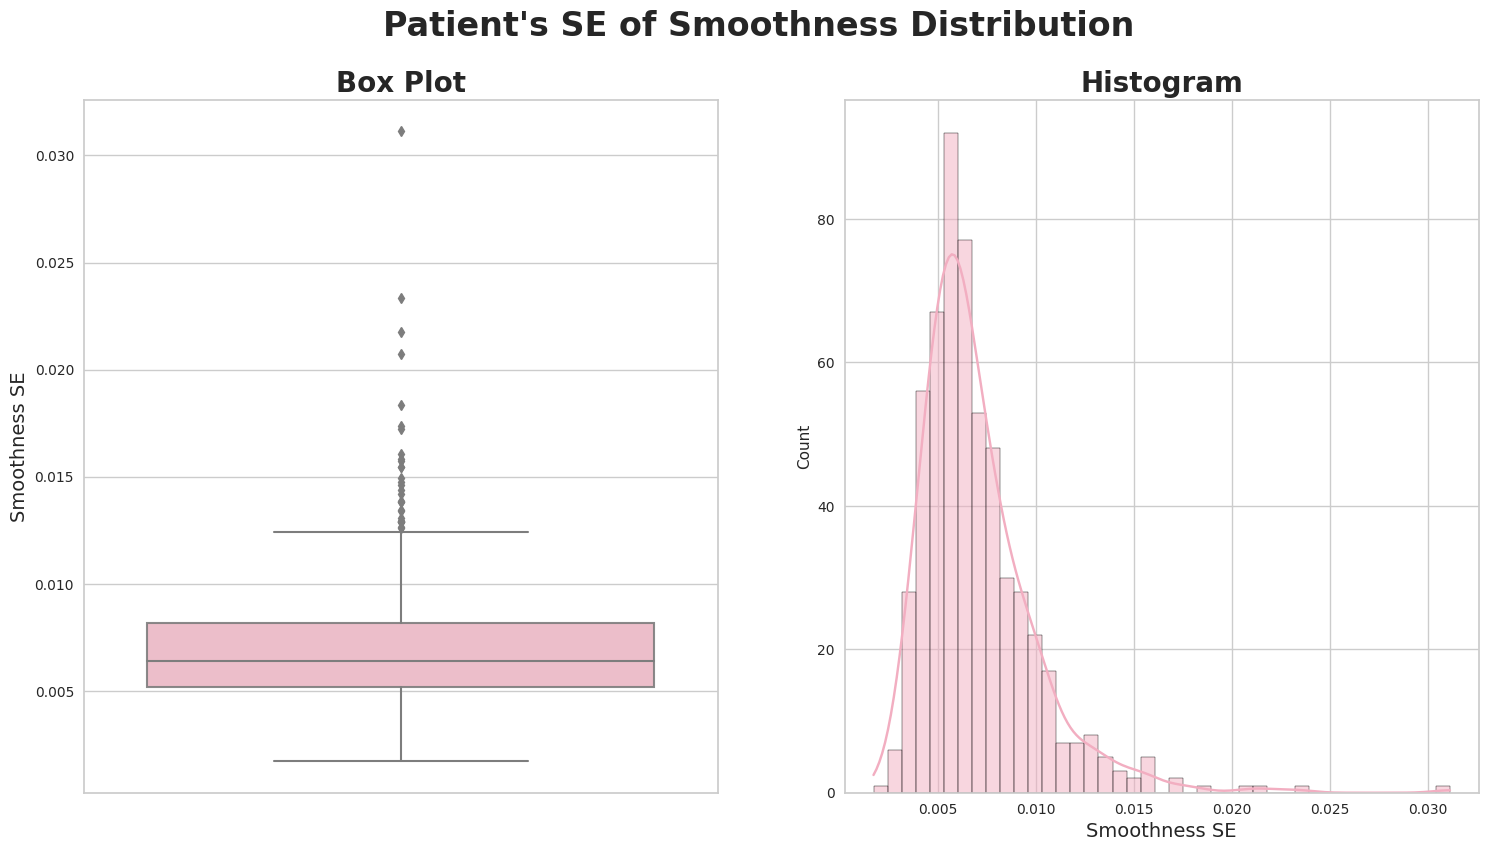

In [37]:
color = '#F2AEC1'
fig = plt.figure(figsize=(18,9))

fig.suptitle("Patient's SE of Smoothness Distribution", fontweight='heavy', fontsize='24')

ax1 = fig.add_subplot(1,2,1)
plt.title('Box Plot', fontweight='bold', fontsize='20')
sns.boxplot(data=df, y='smoothness_se', color=color, boxprops=dict(alpha=0.9), linewidth=1.5)
plt.ylabel('Smoothness SE', fontweight='medium', fontsize='14')

ax2 = fig.add_subplot(1,2,2)
plt.title('Histogram', fontweight='bold', fontsize='20')
sns.histplot(data=df, x='smoothness_se', kde=True, color=color)
plt.xlabel('Smoothness SE', fontweight='medium', fontsize='14')

plt.show()

In [38]:
# -- IQR Calculation --
q1 = np.percentile(df['smoothness_se'], 25)
q3 = np.percentile(df['smoothness_se'], 75)
iqr = q3 - q1

# -- Lower Limit Calculation --
ll = q1 - (1.5 * iqr)

# -- Upper Limit Calculation --
ul = q3 + (1.5 * iqr)

# -- Print --
print("Calculation result\n")
print("Inter Quartil Range\t: {:.3f}".format(iqr))
print("Lower Limit\t\t: {:.3f}".format(ll))
print("Upper Limit\t\t: {:.3f}".format(ul))

Calculation result

Inter Quartil Range	: 0.003
Lower Limit		: 0.001
Upper Limit		: 0.013


<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">From the calculation, we have an <b>Inter Quartile Range</b> value of <b><mark>0.003</mark></b>, a <b>Lower Limit</b> value of <b><mark>0.001</b></mark>, and an <b>Upper Limit</b> value of <b><mark>0.013</b></mark>. Also, it can be seen from the box plot, there are <b><mark>some outliers</b></mark> on the upper side of the data. The histogram also says that the data are <b><mark>left skewed</b></mark>.</div>

## <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">4.16 | compactness_se </div>
<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">
    SE of compactness
</div>

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


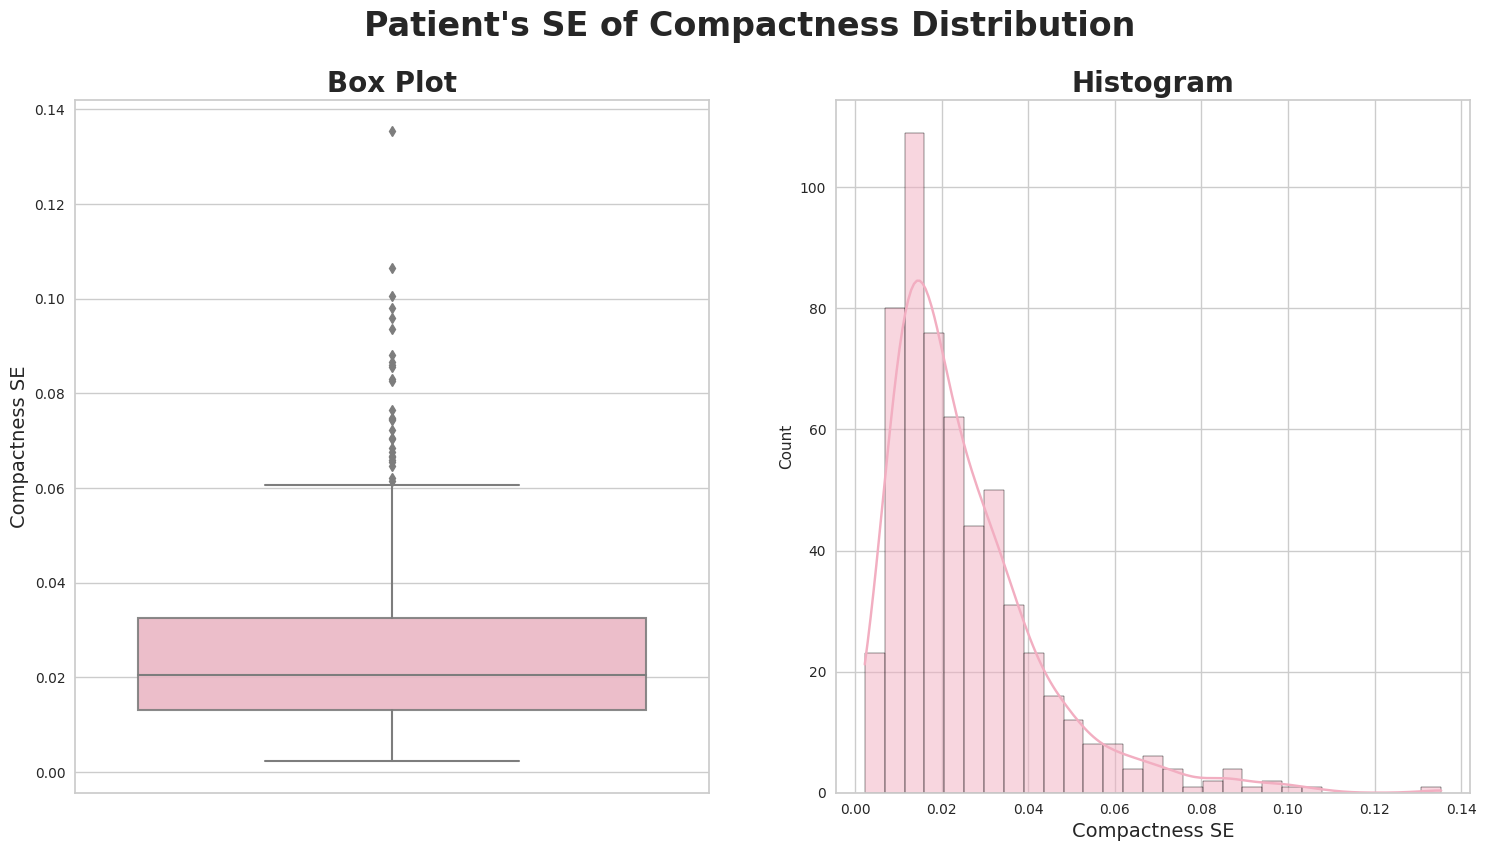

In [39]:
color = '#F2AEC1'
fig = plt.figure(figsize=(18,9))

fig.suptitle("Patient's SE of Compactness Distribution", fontweight='heavy', fontsize='24')

ax1 = fig.add_subplot(1,2,1)
plt.title('Box Plot', fontweight='bold', fontsize='20')
sns.boxplot(data=df, y='compactness_se', color=color, boxprops=dict(alpha=0.9), linewidth=1.5)
plt.ylabel('Compactness SE', fontweight='medium', fontsize='14')

ax2 = fig.add_subplot(1,2,2)
plt.title('Histogram', fontweight='bold', fontsize='20')
sns.histplot(data=df, x='compactness_se', kde=True, color=color)
plt.xlabel('Compactness SE', fontweight='medium', fontsize='14')

plt.show()

In [40]:
# -- IQR Calculation --
q1 = np.percentile(df['compactness_se'], 25)
q3 = np.percentile(df['compactness_se'], 75)
iqr = q3 - q1

# -- Lower Limit Calculation --
ll = q1 - (1.5 * iqr)

# -- Upper Limit Calculation --
ul = q3 + (1.5 * iqr)

# -- Print --
print("Calculation result\n")
print("Inter Quartil Range\t: {:.3f}".format(iqr))
print("Lower Limit\t\t: {:.3f}".format(ll))
print("Upper Limit\t\t: {:.3f}".format(ul))

Calculation result

Inter Quartil Range	: 0.019
Lower Limit		: -0.016
Upper Limit		: 0.062


<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">From the calculation, we have an <b>Inter Quartile Range</b> value of <b><mark>0.019</mark></b>, a <b>Lower Limit</b> value of <b><mark>-0.016</b></mark>, and an <b>Upper Limit</b> value of <b><mark>0.062</b></mark>. Also, it can be seen from the box plot, there are <b><mark>some outliers</b></mark> on the upper side of the data. The histogram also says that the data are <b><mark>left skewed</b></mark>.</div>

## <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">4.17 | concavity_se </div>
<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">
    SE of Concavity
</div>

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


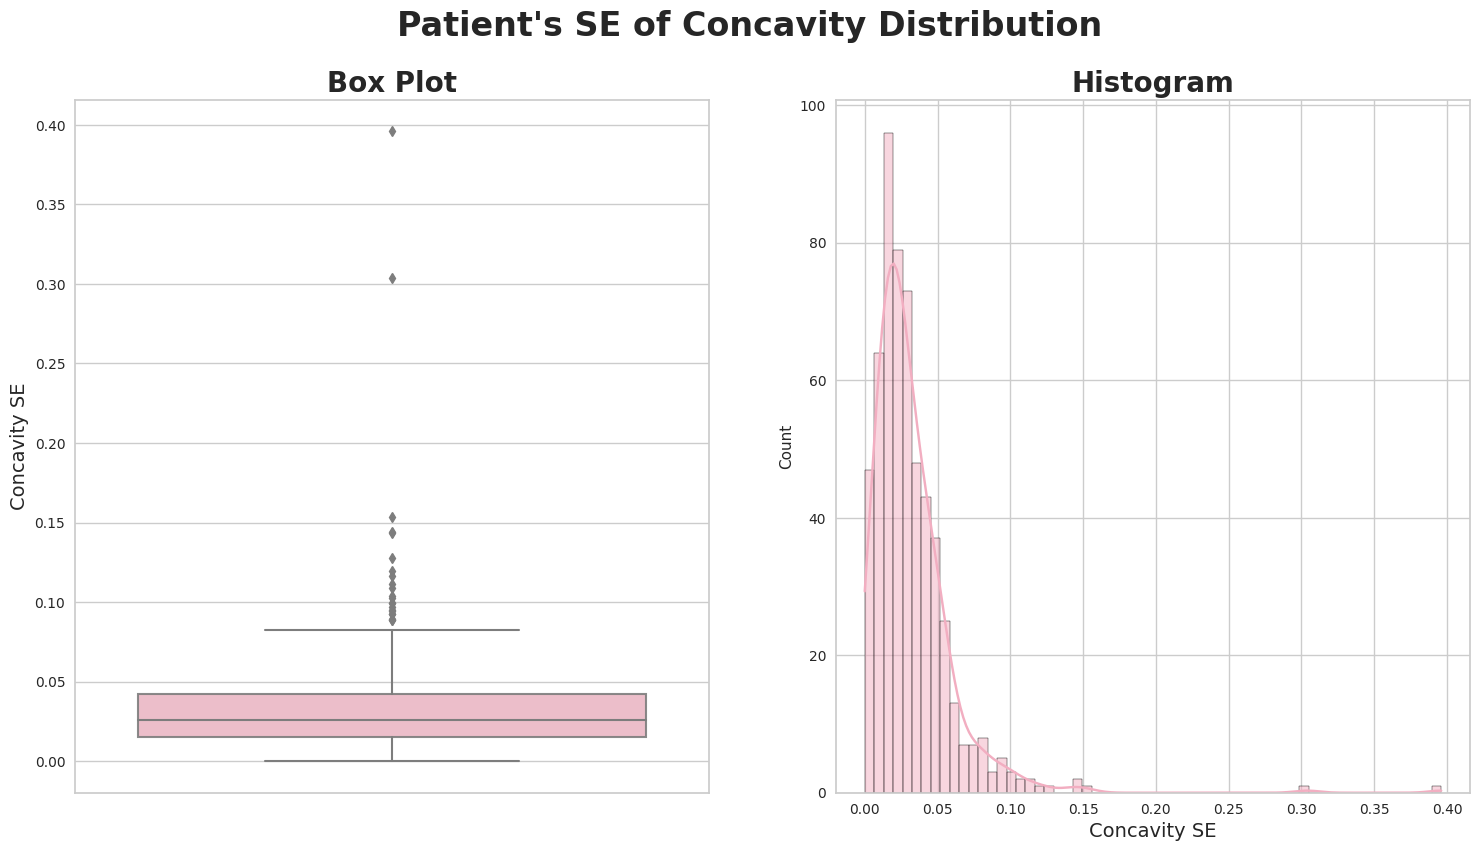

In [41]:
color = '#F2AEC1'
fig = plt.figure(figsize=(18,9))

fig.suptitle("Patient's SE of Concavity Distribution", fontweight='heavy', fontsize='24')

ax1 = fig.add_subplot(1,2,1)
plt.title('Box Plot', fontweight='bold', fontsize='20')
sns.boxplot(data=df, y='concavity_se', color=color, boxprops=dict(alpha=0.9), linewidth=1.5)
plt.ylabel('Concavity SE', fontweight='medium', fontsize='14')

ax2 = fig.add_subplot(1,2,2)
plt.title('Histogram', fontweight='bold', fontsize='20')
sns.histplot(data=df, x='concavity_se', kde=True, color=color)
plt.xlabel('Concavity SE', fontweight='medium', fontsize='14')

plt.show()

In [42]:
# -- IQR Calculation --
q1 = np.percentile(df['concavity_se'], 25)
q3 = np.percentile(df['concavity_se'], 75)
iqr = q3 - q1

# -- Lower Limit Calculation --
ll = q1 - (1.5 * iqr)

# -- Upper Limit Calculation --
ul = q3 + (1.5 * iqr)

# -- Print --
print("Calculation result\n")
print("Inter Quartil Range\t: {:.3f}".format(iqr))
print("Lower Limit\t\t: {:.3f}".format(ll))
print("Upper Limit\t\t: {:.3f}".format(ul))

Calculation result

Inter Quartil Range	: 0.027
Lower Limit		: -0.025
Upper Limit		: 0.082


<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">From the calculation, we have an <b>Inter Quartile Range</b> value of <b><mark>0.027</mark></b>, a <b>Lower Limit</b> value of <b><mark>-0.025</b></mark>, and an <b>Upper Limit</b> value of <b><mark>0.082</b></mark>. Also, it can be seen from the box plot, there are <b><mark>some outliers</b></mark> on the upper side of the data. The histogram also says that the data are <b><mark>left skewed</b></mark>.</div>

## <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">4.18 | concave_points_se </div>
<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">
    SE of Concave Points
</div>

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


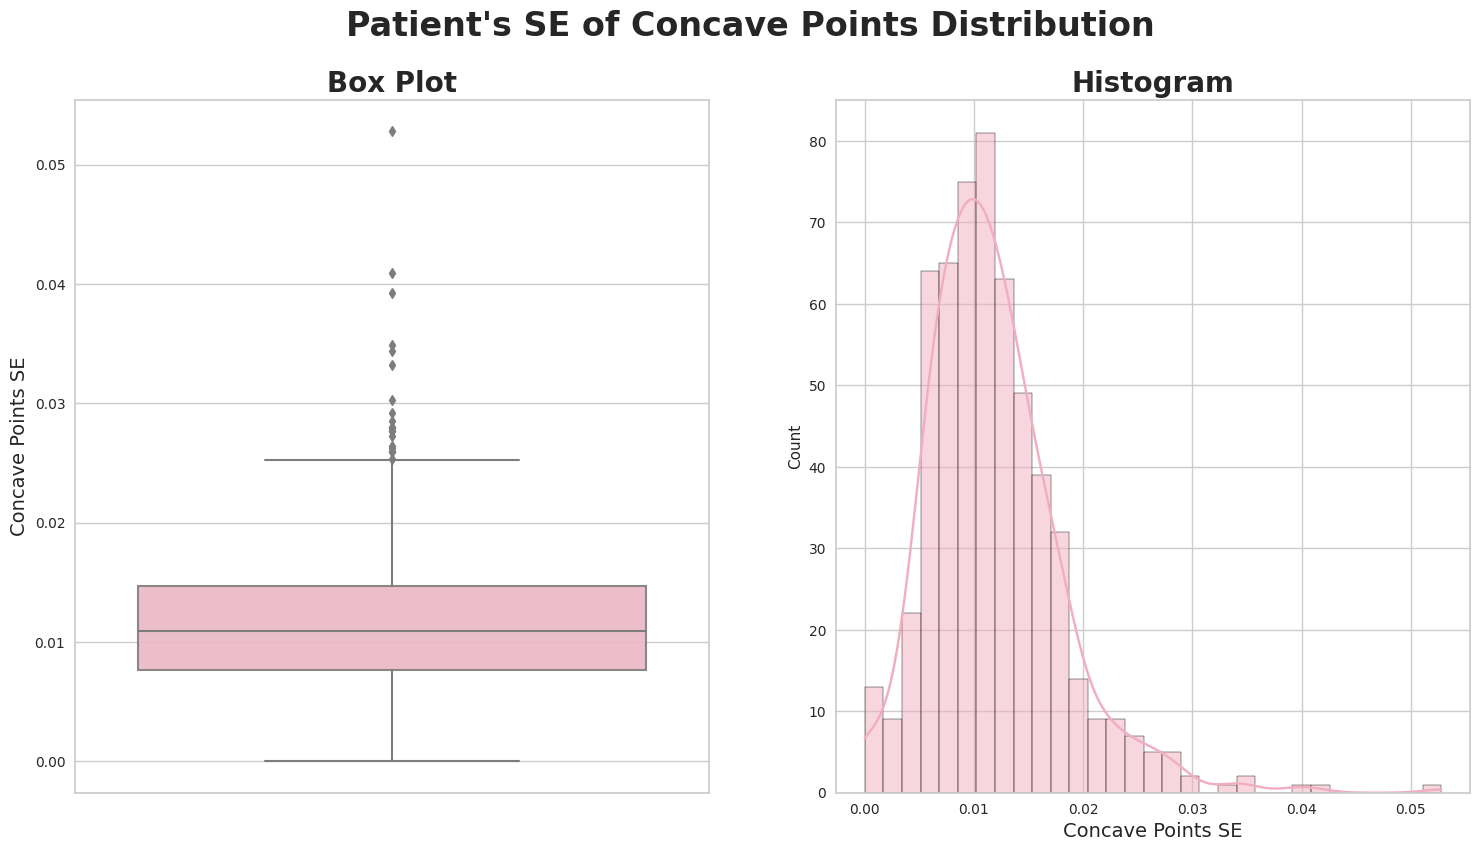

In [43]:
color = '#F2AEC1'
fig = plt.figure(figsize=(18,9))

fig.suptitle("Patient's SE of Concave Points Distribution", fontweight='heavy', fontsize='24')

ax1 = fig.add_subplot(1,2,1)
plt.title('Box Plot', fontweight='bold', fontsize='20')
sns.boxplot(data=df, y='concave_points_se', color=color, boxprops=dict(alpha=0.9), linewidth=1.5)
plt.ylabel('Concave Points SE', fontweight='medium', fontsize='14')

ax2 = fig.add_subplot(1,2,2)
plt.title('Histogram', fontweight='bold', fontsize='20')
sns.histplot(data=df, x='concave_points_se', kde=True, color=color)
plt.xlabel('Concave Points SE', fontweight='medium', fontsize='14')

plt.show()

In [44]:
# -- IQR Calculation --
q1 = np.percentile(df['concave_points_se'], 25)
q3 = np.percentile(df['concave_points_se'], 75)
iqr = q3 - q1

# -- Lower Limit Calculation --
ll = q1 - (1.5 * iqr)

# -- Upper Limit Calculation --
ul = q3 + (1.5 * iqr)

# -- Print --
print("Calculation result\n")
print("Inter Quartil Range\t: {:.3f}".format(iqr))
print("Lower Limit\t\t: {:.3f}".format(ll))
print("Upper Limit\t\t: {:.3f}".format(ul))

Calculation result

Inter Quartil Range	: 0.007
Lower Limit		: -0.003
Upper Limit		: 0.025


<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">From the calculation, we have an <b>Inter Quartile Range</b> value of <b><mark>0.007</mark></b>, a <b>Lower Limit</b> value of <b><mark>-0.003</b></mark>, and an <b>Upper Limit</b> value of <b><mark>0.025</b></mark>. Also, it can be seen from the box plot, there are <b><mark>some outliers</b></mark> on the upper side of the data. The histogram also says that the data are <b><mark>left skewed</b></mark>.</div>

## <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">4.19 | symmetry_se </div>
<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">
    SE of Symmetry
</div>

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


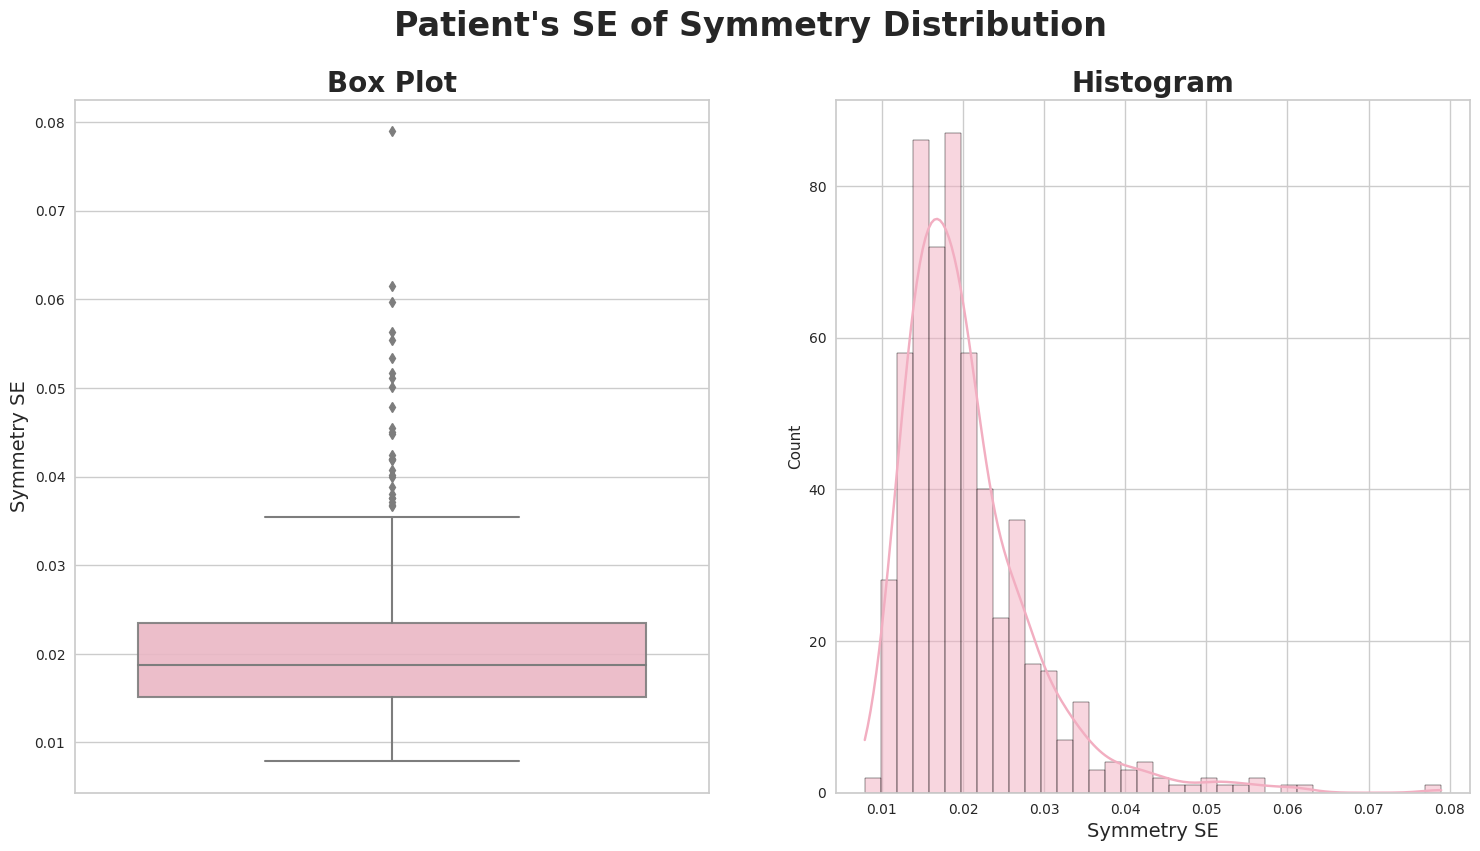

In [45]:
color = '#F2AEC1'
fig = plt.figure(figsize=(18,9))

fig.suptitle("Patient's SE of Symmetry Distribution", fontweight='heavy', fontsize='24')

ax1 = fig.add_subplot(1,2,1)
plt.title('Box Plot', fontweight='bold', fontsize='20')
sns.boxplot(data=df, y='symmetry_se', color=color, boxprops=dict(alpha=0.9), linewidth=1.5)
plt.ylabel('Symmetry SE', fontweight='medium', fontsize='14')

ax2 = fig.add_subplot(1,2,2)
plt.title('Histogram', fontweight='bold', fontsize='20')
sns.histplot(data=df, x='symmetry_se', kde=True, color=color)
plt.xlabel('Symmetry SE', fontweight='medium', fontsize='14')

plt.show()

In [46]:
# -- IQR Calculation --
q1 = np.percentile(df['symmetry_se'], 25)
q3 = np.percentile(df['symmetry_se'], 75)
iqr = q3 - q1

# -- Lower Limit Calculation --
ll = q1 - (1.5 * iqr)

# -- Upper Limit Calculation --
ul = q3 + (1.5 * iqr)

# -- Print --
print("Calculation result\n")
print("Inter Quartil Range\t: {:.3f}".format(iqr))
print("Lower Limit\t\t: {:.3f}".format(ll))
print("Upper Limit\t\t: {:.3f}".format(ul))

Calculation result

Inter Quartil Range	: 0.008
Lower Limit		: 0.003
Upper Limit		: 0.036


<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">From the calculation, we have an <b>Inter Quartile Range</b> value of <b><mark>0.008</mark></b>, a <b>Lower Limit</b> value of <b><mark>0.003</b></mark>, and an <b>Upper Limit</b> value of <b><mark>0.036</b></mark>. Also, it can be seen from the box plot, there are <b><mark>some outliers</b></mark> on the upper side of the data. The histogram also says that the data are <b><mark>left skewed</b></mark>.</div>

## <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">4.20 | fractal_dimension_se </div>
<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">
    SE of Fractal Dimension
</div>

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


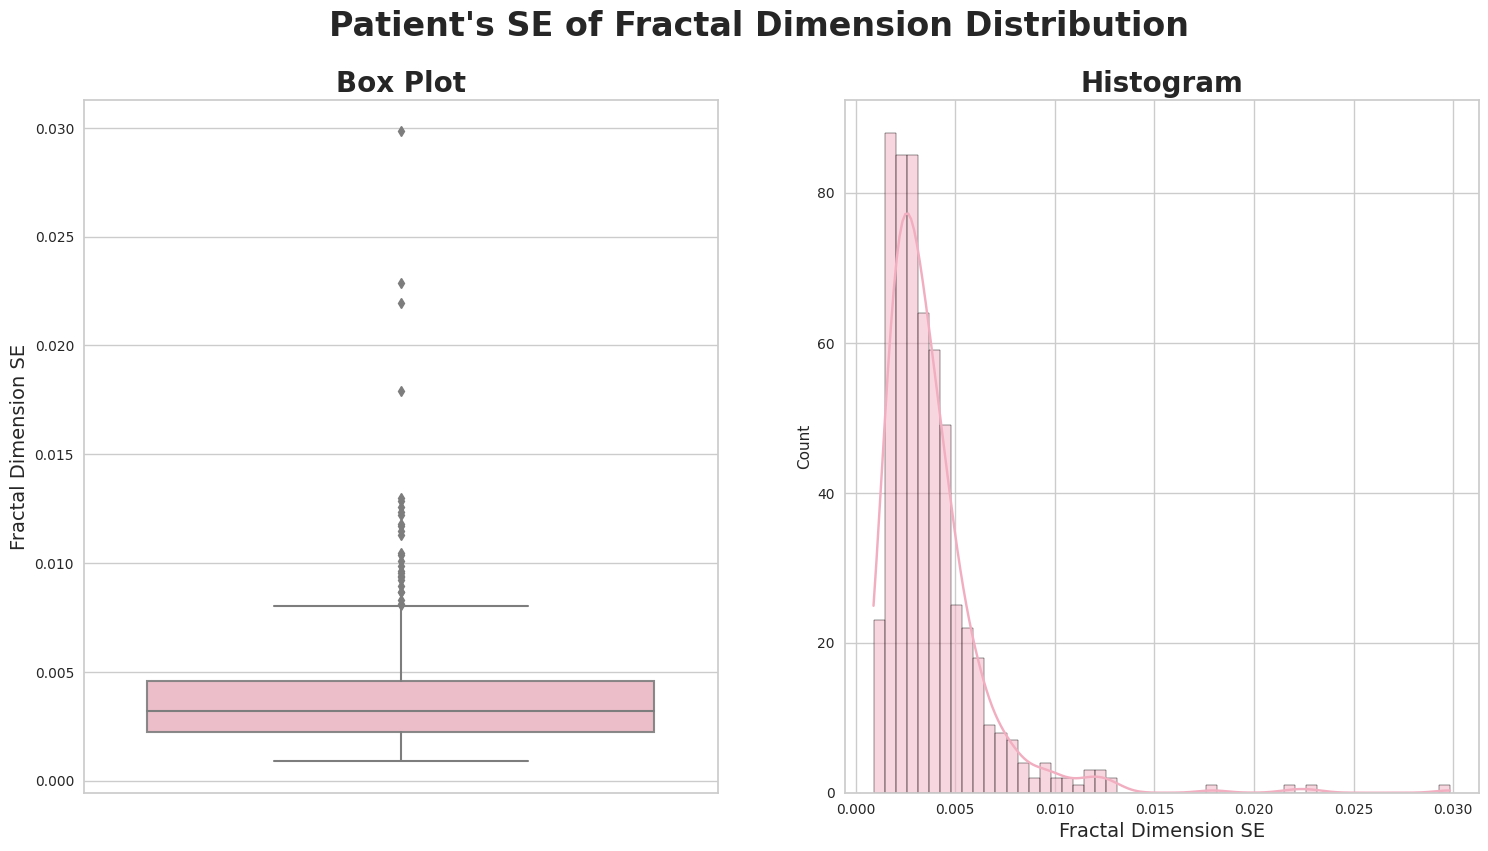

In [47]:
color = '#F2AEC1'
fig = plt.figure(figsize=(18,9))

fig.suptitle("Patient's SE of Fractal Dimension Distribution", fontweight='heavy', fontsize='24')

ax1 = fig.add_subplot(1,2,1)
plt.title('Box Plot', fontweight='bold', fontsize='20')
sns.boxplot(data=df, y='fractal_dimension_se', color=color, boxprops=dict(alpha=0.9), linewidth=1.5)
plt.ylabel('Fractal Dimension SE', fontweight='medium', fontsize='14')

ax2 = fig.add_subplot(1,2,2)
plt.title('Histogram', fontweight='bold', fontsize='20')
sns.histplot(data=df, x='fractal_dimension_se', kde=True, color=color)
plt.xlabel('Fractal Dimension SE', fontweight='medium', fontsize='14')

plt.show()

In [48]:
# -- IQR Calculation --
q1 = np.percentile(df['fractal_dimension_se'], 25)
q3 = np.percentile(df['fractal_dimension_se'], 75)
iqr = q3 - q1

# -- Lower Limit Calculation --
ll = q1 - (1.5 * iqr)

# -- Upper Limit Calculation --
ul = q3 + (1.5 * iqr)

# -- Print --
print("Calculation result\n")
print("Inter Quartil Range\t: {:.3f}".format(iqr))
print("Lower Limit\t\t: {:.3f}".format(ll))
print("Upper Limit\t\t: {:.3f}".format(ul))

Calculation result

Inter Quartil Range	: 0.002
Lower Limit		: -0.001
Upper Limit		: 0.008


<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">From the calculation, we have an <b>Inter Quartile Range</b> value of <b><mark>0.002</mark></b>, a <b>Lower Limit</b> value of <b><mark>-0.001</b></mark>, and an <b>Upper Limit</b> value of <b><mark>0.008</b></mark>. Also, it can be seen from the box plot, there are <b><mark>some outliers</b></mark> on the upper side of the data. The histogram also says that the data are <b><mark>left skewed</b></mark>.</div>

## <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">4.21 | radius_worst </div>
<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">
    Worst Radius
</div>

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


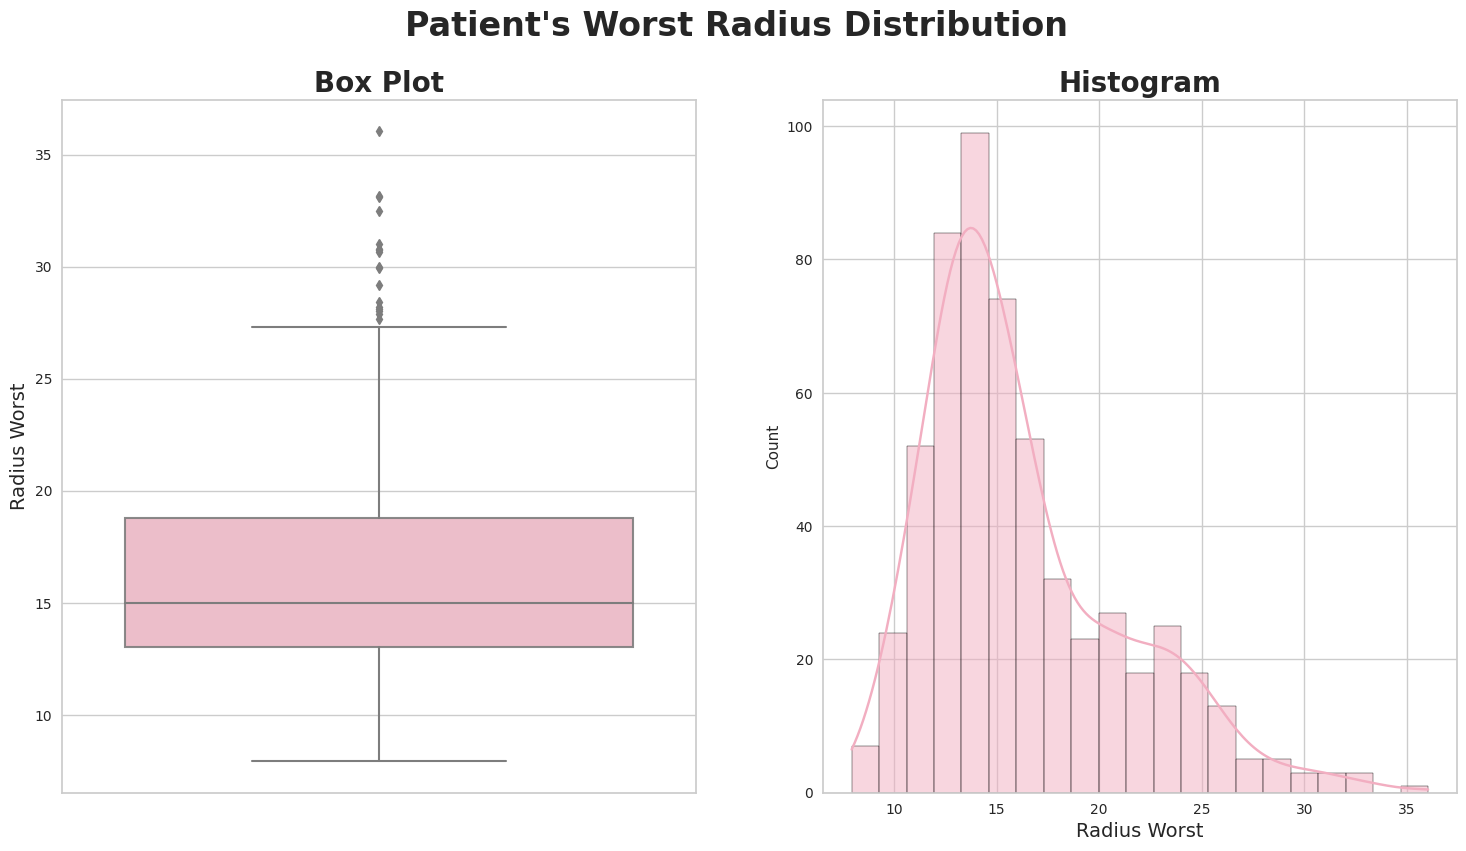

In [49]:
color = '#F2AEC1'
fig = plt.figure(figsize=(18,9))

fig.suptitle("Patient's Worst Radius Distribution", fontweight='heavy', fontsize='24')

ax1 = fig.add_subplot(1,2,1)
plt.title('Box Plot', fontweight='bold', fontsize='20')
sns.boxplot(data=df, y='radius_worst', color=color, boxprops=dict(alpha=0.9), linewidth=1.5)
plt.ylabel('Radius Worst', fontweight='medium', fontsize='14')

ax2 = fig.add_subplot(1,2,2)
plt.title('Histogram', fontweight='bold', fontsize='20')
sns.histplot(data=df, x='radius_worst', kde=True, color=color)
plt.xlabel('Radius Worst', fontweight='medium', fontsize='14')

plt.show()

In [50]:
# -- IQR Calculation --
q1 = np.percentile(df['radius_worst'], 25)
q3 = np.percentile(df['radius_worst'], 75)
iqr = q3 - q1

# -- Lower Limit Calculation --
ll = q1 - (1.5 * iqr)

# -- Upper Limit Calculation --
ul = q3 + (1.5 * iqr)

# -- Print --
print("Calculation result\n")
print("Inter Quartil Range\t: {:.3f}".format(iqr))
print("Lower Limit\t\t: {:.3f}".format(ll))
print("Upper Limit\t\t: {:.3f}".format(ul))

Calculation result

Inter Quartil Range	: 5.780
Lower Limit		: 4.340
Upper Limit		: 27.460


<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">From the calculation, we have an <b>Inter Quartile Range</b> value of <b><mark>5.780</mark></b>, a <b>Lower Limit</b> value of <b><mark>4.340</b></mark>, and an <b>Upper Limit</b> value of <b><mark>27.460</b></mark>. Also, it can be seen from the box plot, there are <b><mark>some outliers</b></mark> on the upper side of the data. The histogram also says that the data are <b><mark>left skewed</b></mark>.</div>

## <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">4.22 | texture_worst </div>
<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">
    Worst Texture
</div>

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


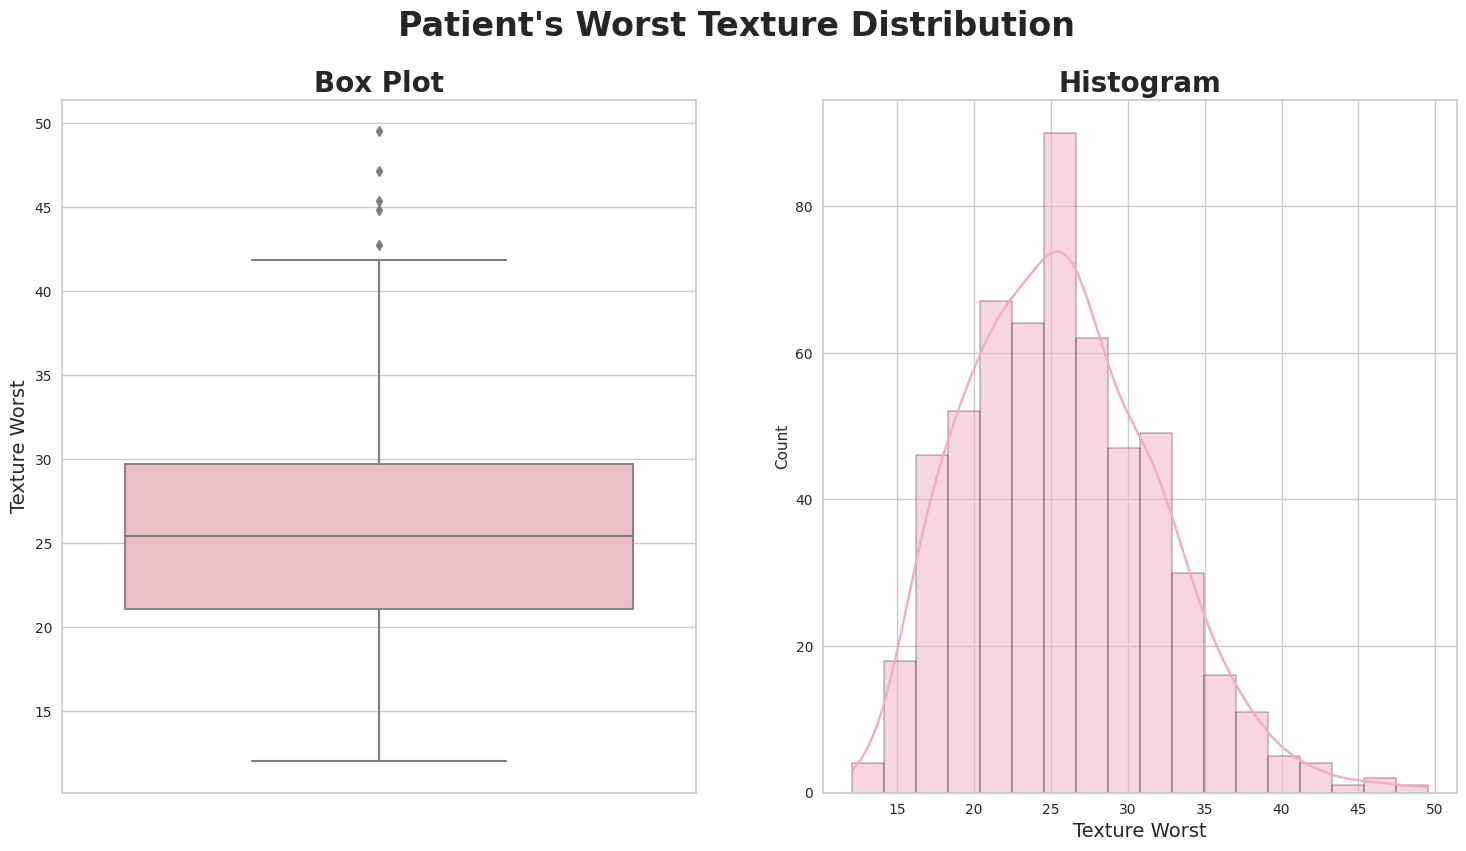

In [51]:
color = '#F2AEC1'
fig = plt.figure(figsize=(18,9))

fig.suptitle("Patient's Worst Texture Distribution", fontweight='heavy', fontsize='24')

ax1 = fig.add_subplot(1,2,1)
plt.title('Box Plot', fontweight='bold', fontsize='20')
sns.boxplot(data=df, y='texture_worst', color=color, boxprops=dict(alpha=0.9), linewidth=1.5)
plt.ylabel('Texture Worst', fontweight='medium', fontsize='14')

ax2 = fig.add_subplot(1,2,2)
plt.title('Histogram', fontweight='bold', fontsize='20')
sns.histplot(data=df, x='texture_worst', kde=True, color=color)
plt.xlabel('Texture Worst', fontweight='medium', fontsize='14')

plt.show()

In [52]:
# -- IQR Calculation --
q1 = np.percentile(df['texture_worst'], 25)
q3 = np.percentile(df['texture_worst'], 75)
iqr = q3 - q1

# -- Lower Limit Calculation --
ll = q1 - (1.5 * iqr)

# -- Upper Limit Calculation --
ul = q3 + (1.5 * iqr)

# -- Print --
print("Calculation result\n")
print("Inter Quartil Range\t: {:.3f}".format(iqr))
print("Lower Limit\t\t: {:.3f}".format(ll))
print("Upper Limit\t\t: {:.3f}".format(ul))

Calculation result

Inter Quartil Range	: 8.640
Lower Limit		: 8.120
Upper Limit		: 42.680


<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">From the calculation, we have an <b>Inter Quartile Range</b> value of <b><mark>8.640</mark></b>, a <b>Lower Limit</b> value of <b><mark>8.120</b></mark>, and an <b>Upper Limit</b> value of <b><mark>42.680</b></mark>. Also, it can be seen from the box plot, there are <b><mark>some outliers</b></mark> on the upper side of the data. The histogram also says that the data are <b><mark>left skewed</b></mark>.</div>

## <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">4.23 | perimeter_worst </div>
<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">
    Worst Perimeter
</div>

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


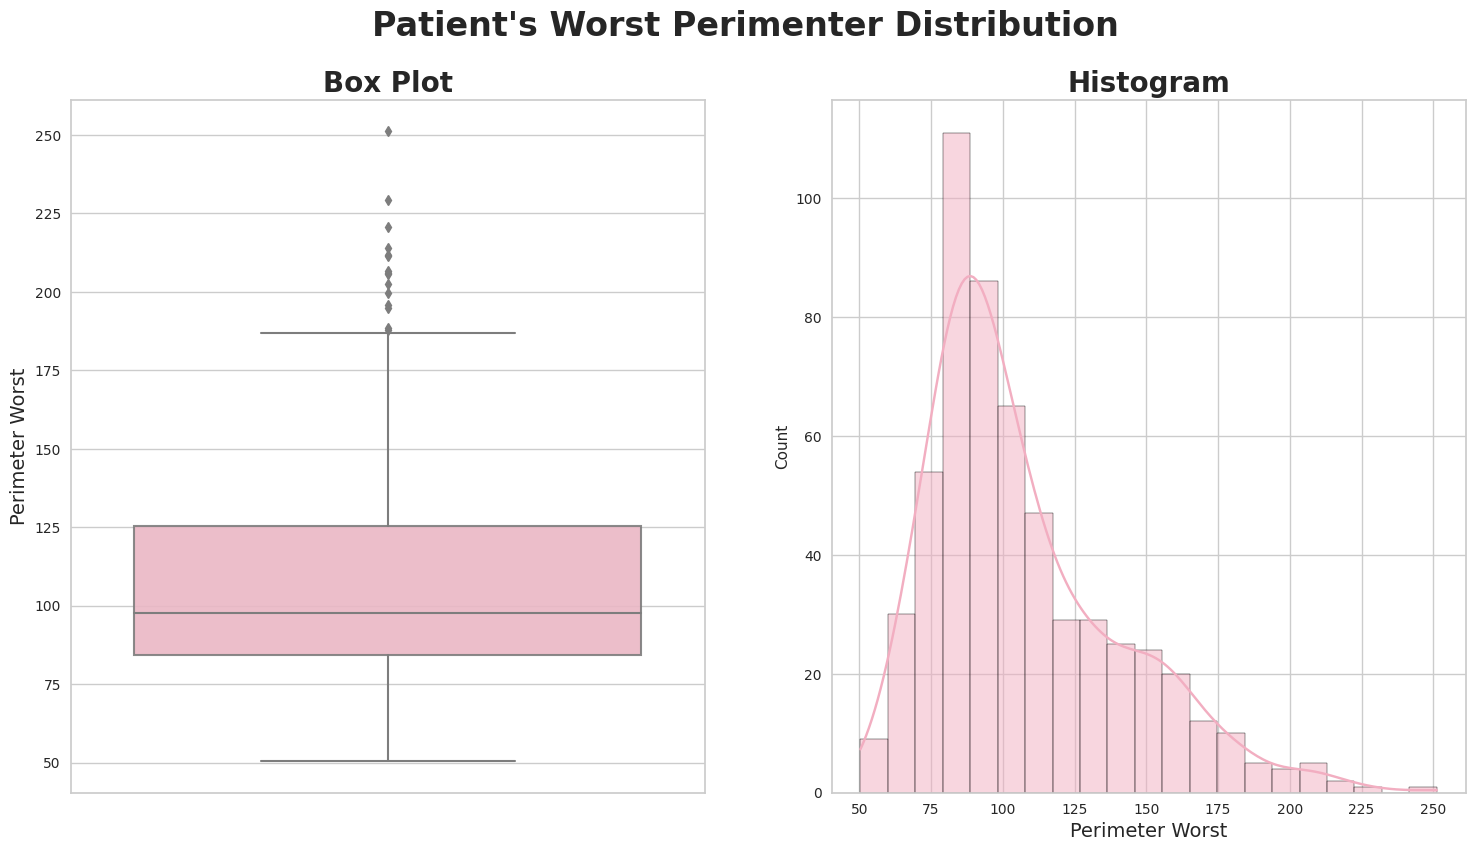

In [53]:
color = '#F2AEC1'
fig = plt.figure(figsize=(18,9))

fig.suptitle("Patient's Worst Perimenter Distribution", fontweight='heavy', fontsize='24')

ax1 = fig.add_subplot(1,2,1)
plt.title('Box Plot', fontweight='bold', fontsize='20')
sns.boxplot(data=df, y='perimeter_worst', color=color, boxprops=dict(alpha=0.9), linewidth=1.5)
plt.ylabel('Perimeter Worst', fontweight='medium', fontsize='14')

ax2 = fig.add_subplot(1,2,2)
plt.title('Histogram', fontweight='bold', fontsize='20')
sns.histplot(data=df, x='perimeter_worst', kde=True, color=color)
plt.xlabel('Perimeter Worst', fontweight='medium', fontsize='14')

plt.show()

In [54]:
# -- IQR Calculation --
q1 = np.percentile(df['perimeter_worst'], 25)
q3 = np.percentile(df['perimeter_worst'], 75)
iqr = q3 - q1

# -- Lower Limit Calculation --
ll = q1 - (1.5 * iqr)

# -- Upper Limit Calculation --
ul = q3 + (1.5 * iqr)

# -- Print --
print("Calculation result\n")
print("Inter Quartil Range\t: {:.3f}".format(iqr))
print("Lower Limit\t\t: {:.3f}".format(ll))
print("Upper Limit\t\t: {:.3f}".format(ul))

Calculation result

Inter Quartil Range	: 41.290
Lower Limit		: 22.175
Upper Limit		: 187.335


<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">From the calculation, we have an <b>Inter Quartile Range</b> value of <b><mark>41.290</mark></b>, a <b>Lower Limit</b> value of <b><mark>22.175</b></mark>, and an <b>Upper Limit</b> value of <b><mark>187.335</b></mark>. Also, it can be seen from the box plot, there are <b><mark>some outliers</b></mark> on the upper side of the data. The histogram also says that the data are <b><mark>left skewed</b></mark>.</div>

## <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">4.24 | area_worst </div>
<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">
    Worst Area
</div>

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


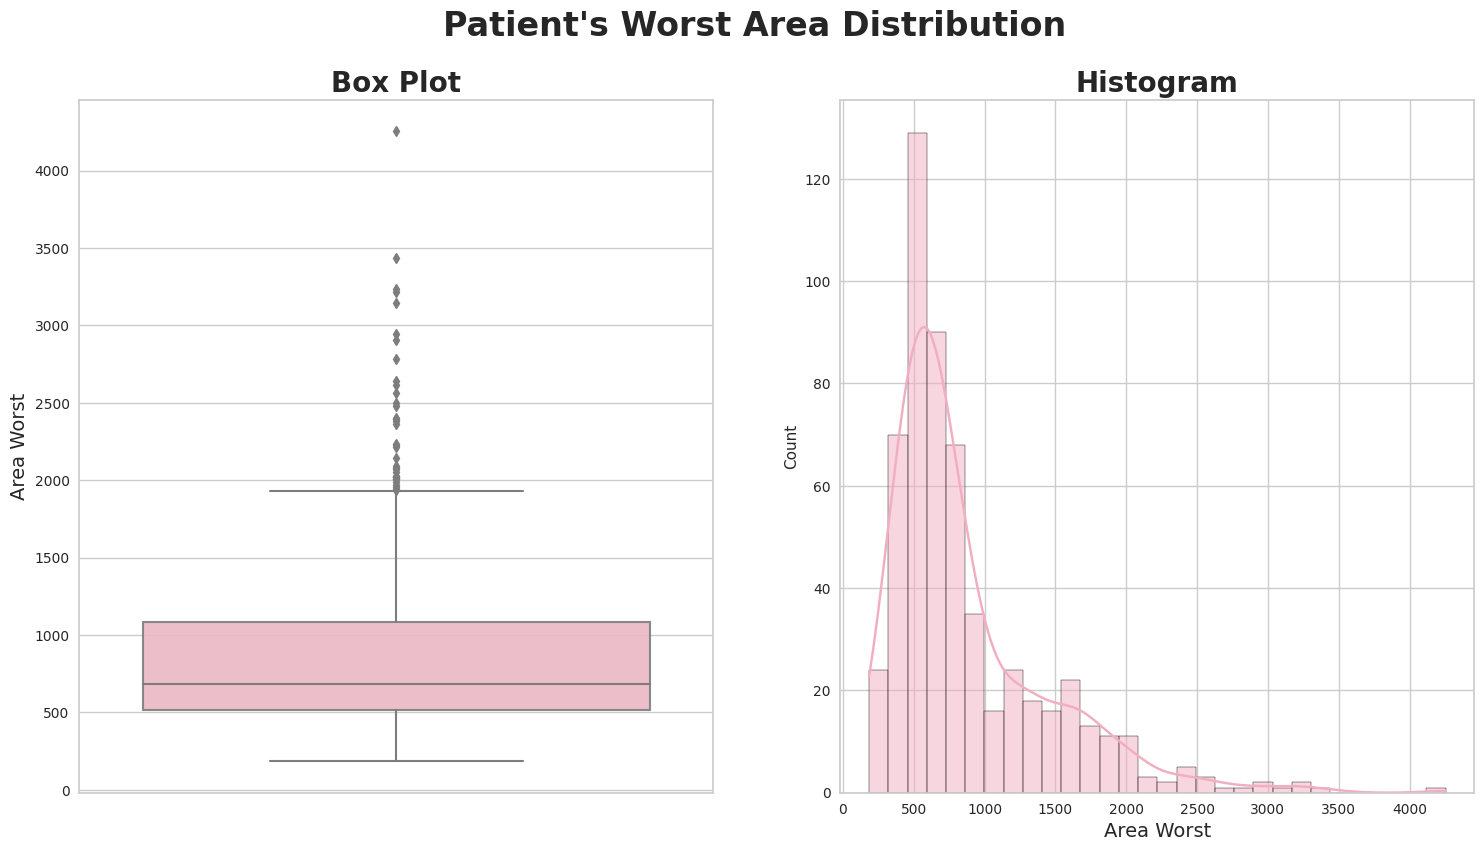

In [55]:
color = '#F2AEC1'
fig = plt.figure(figsize=(18,9))

fig.suptitle("Patient's Worst Area Distribution", fontweight='heavy', fontsize='24')

ax1 = fig.add_subplot(1,2,1)
plt.title('Box Plot', fontweight='bold', fontsize='20')
sns.boxplot(data=df, y='area_worst', color=color, boxprops=dict(alpha=0.9), linewidth=1.5)
plt.ylabel('Area Worst', fontweight='medium', fontsize='14')

ax2 = fig.add_subplot(1,2,2)
plt.title('Histogram', fontweight='bold', fontsize='20')
sns.histplot(data=df, x='area_worst', kde=True, color=color)
plt.xlabel('Area Worst', fontweight='medium', fontsize='14')

plt.show()

In [56]:
# -- IQR Calculation --
q1 = np.percentile(df['area_worst'], 25)
q3 = np.percentile(df['area_worst'], 75)
iqr = q3 - q1

# -- Lower Limit Calculation --
ll = q1 - (1.5 * iqr)

# -- Upper Limit Calculation --
ul = q3 + (1.5 * iqr)

# -- Print --
print("Calculation result\n")
print("Inter Quartil Range\t: {:.3f}".format(iqr))
print("Lower Limit\t\t: {:.3f}".format(ll))
print("Upper Limit\t\t: {:.3f}".format(ul))

Calculation result

Inter Quartil Range	: 568.700
Lower Limit		: -337.750
Upper Limit		: 1937.050


<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">From the calculation, we have an <b>Inter Quartile Range</b> value of <b><mark>568.700</mark></b>, a <b>Lower Limit</b> value of <b><mark>-337.750</b></mark>, and an <b>Upper Limit</b> value of <b><mark>1937.050</b></mark>. Also, it can be seen from the box plot, there are <b><mark>some outliers</b></mark> on the upper side of the data. The histogram also says that the data are <b><mark>left skewed</b></mark>.</div>

## <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">4.25 | smoothness_worst </div>
<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">
    Worst Smoothness
</div>

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


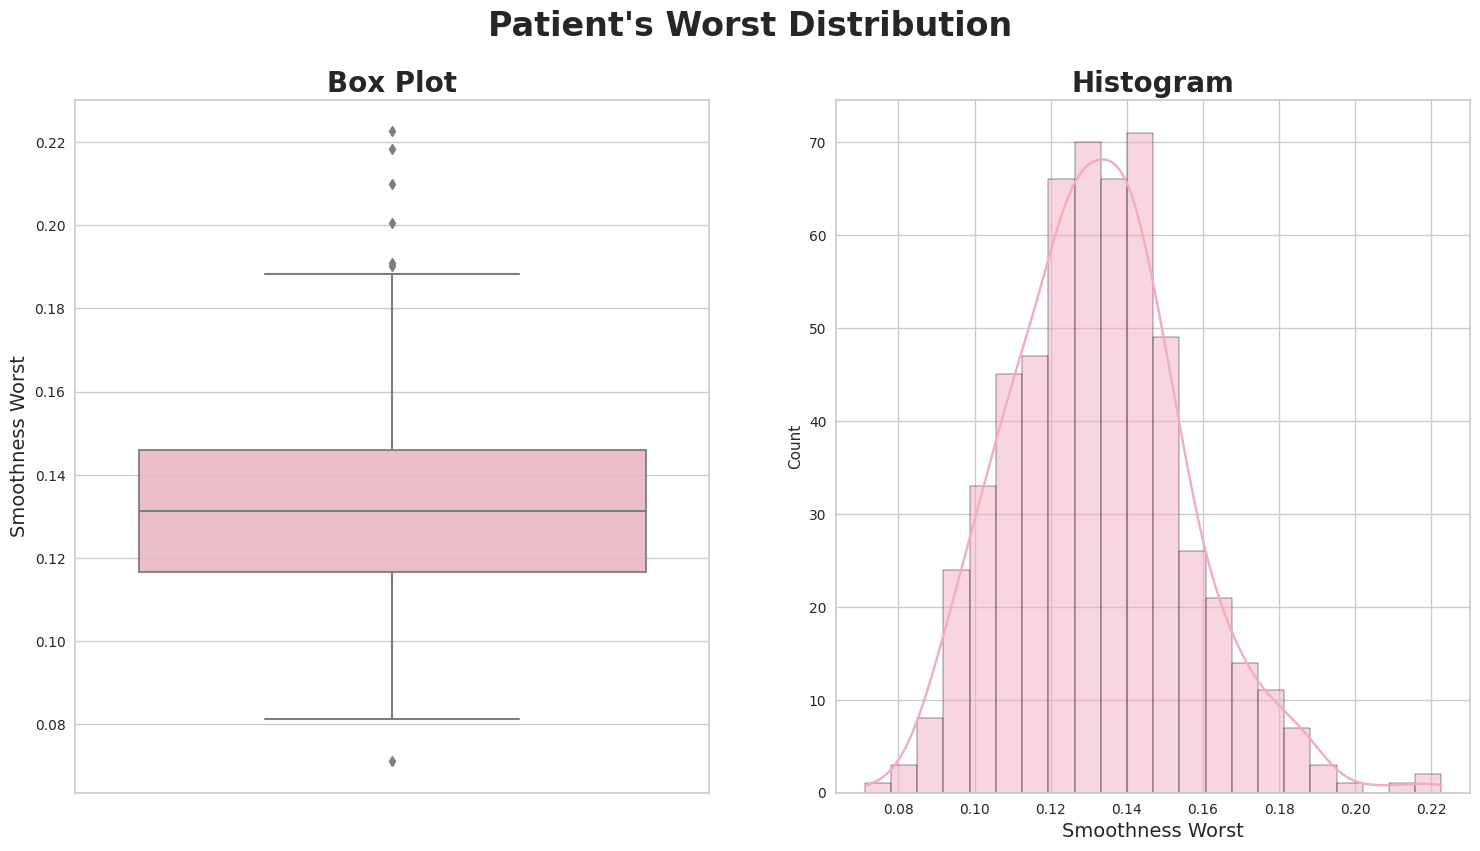

In [57]:
color = '#F2AEC1'
fig = plt.figure(figsize=(18,9))

fig.suptitle("Patient's Worst Distribution", fontweight='heavy', fontsize='24')

ax1 = fig.add_subplot(1,2,1)
plt.title('Box Plot', fontweight='bold', fontsize='20')
sns.boxplot(data=df, y='smoothness_worst', color=color, boxprops=dict(alpha=0.9), linewidth=1.5)
plt.ylabel('Smoothness Worst', fontweight='medium', fontsize='14')

ax2 = fig.add_subplot(1,2,2)
plt.title('Histogram', fontweight='bold', fontsize='20')
sns.histplot(data=df, x='smoothness_worst', kde=True, color=color)
plt.xlabel('Smoothness Worst', fontweight='medium', fontsize='14')

plt.show()

In [58]:
# -- IQR Calculation --
q1 = np.percentile(df['smoothness_worst'], 25)
q3 = np.percentile(df['smoothness_worst'], 75)
iqr = q3 - q1

# -- Lower Limit Calculation --
ll = q1 - (1.5 * iqr)

# -- Upper Limit Calculation --
ul = q3 + (1.5 * iqr)

# -- Print --
print("Calculation result\n")
print("Inter Quartil Range\t: {:.3f}".format(iqr))
print("Lower Limit\t\t: {:.3f}".format(ll))
print("Upper Limit\t\t: {:.3f}".format(ul))

Calculation result

Inter Quartil Range	: 0.029
Lower Limit		: 0.073
Upper Limit		: 0.190


<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">From the calculation, we have an <b>Inter Quartile Range</b> value of <b><mark>0.029</mark></b>, a <b>Lower Limit</b> value of <b><mark>0.073</b></mark>, and an <b>Upper Limit</b> value of <b><mark>0.190</b></mark>. Also, it can be seen from the box plot, there are <b><mark>some outliers</b></mark> on the upper side and <b><mark>one outlier</b></mark> on the lower side of the data. The histogram also says that the data are <b><mark>left skewed</b></mark>.</div>

## <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">4.26 | compactness_worst </div>
<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">
    Worse Compactness
</div>

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


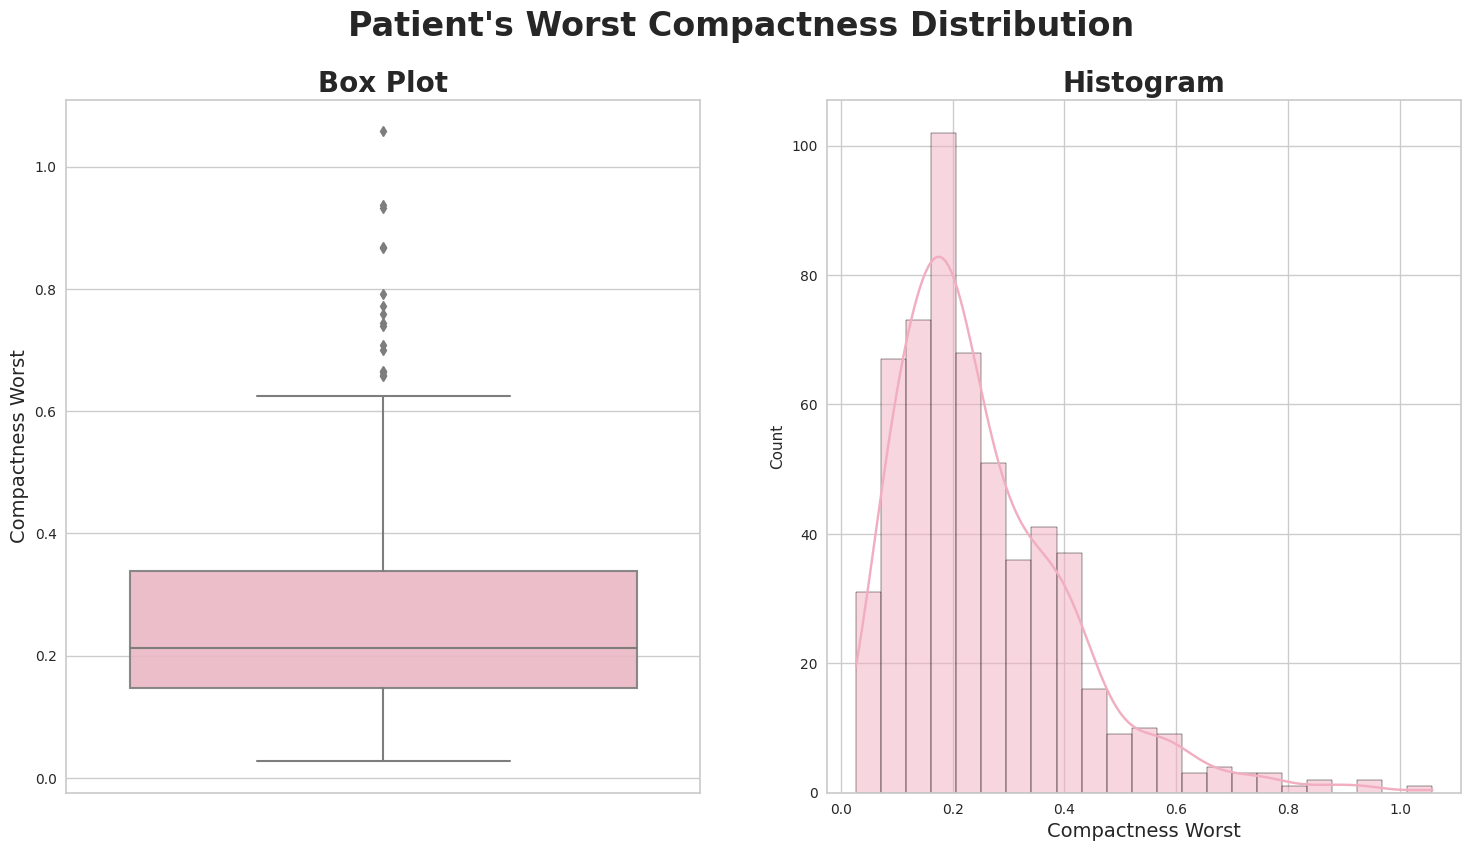

In [59]:
color = '#F2AEC1'
fig = plt.figure(figsize=(18,9))

fig.suptitle("Patient's Worst Compactness Distribution", fontweight='heavy', fontsize='24')

ax1 = fig.add_subplot(1,2,1)
plt.title('Box Plot', fontweight='bold', fontsize='20')
sns.boxplot(data=df, y='compactness_worst', color=color, boxprops=dict(alpha=0.9), linewidth=1.5)
plt.ylabel('Compactness Worst', fontweight='medium', fontsize='14')

ax2 = fig.add_subplot(1,2,2)
plt.title('Histogram', fontweight='bold', fontsize='20')
sns.histplot(data=df, x='compactness_worst', kde=True, color=color)
plt.xlabel('Compactness Worst', fontweight='medium', fontsize='14')

plt.show()

In [60]:
# -- IQR Calculation --
q1 = np.percentile(df['compactness_worst'], 25)
q3 = np.percentile(df['compactness_worst'], 75)
iqr = q3 - q1

# -- Lower Limit Calculation --
ll = q1 - (1.5 * iqr)

# -- Upper Limit Calculation --
ul = q3 + (1.5 * iqr)

# -- Print --
print("Calculation result\n")
print("Inter Quartil Range\t: {:.3f}".format(iqr))
print("Lower Limit\t\t: {:.3f}".format(ll))
print("Upper Limit\t\t: {:.3f}".format(ul))

Calculation result

Inter Quartil Range	: 0.192
Lower Limit		: -0.141
Upper Limit		: 0.627


<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">From the calculation, we have an <b>Inter Quartile Range</b> value of <b><mark>0.192</mark></b>, a <b>Lower Limit</b> value of <b><mark>-0.141</b></mark>, and an <b>Upper Limit</b> value of <b><mark>0.627</b></mark>. Also, it can be seen from the box plot, there are <b><mark>some outliers</b></mark> on the upper side of the data. The histogram also says that the data are <b><mark>left skewed</b></mark>.</div>

## <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">4.27 | concavity_worst </div>
<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">
    Worst Concavity
</div>

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


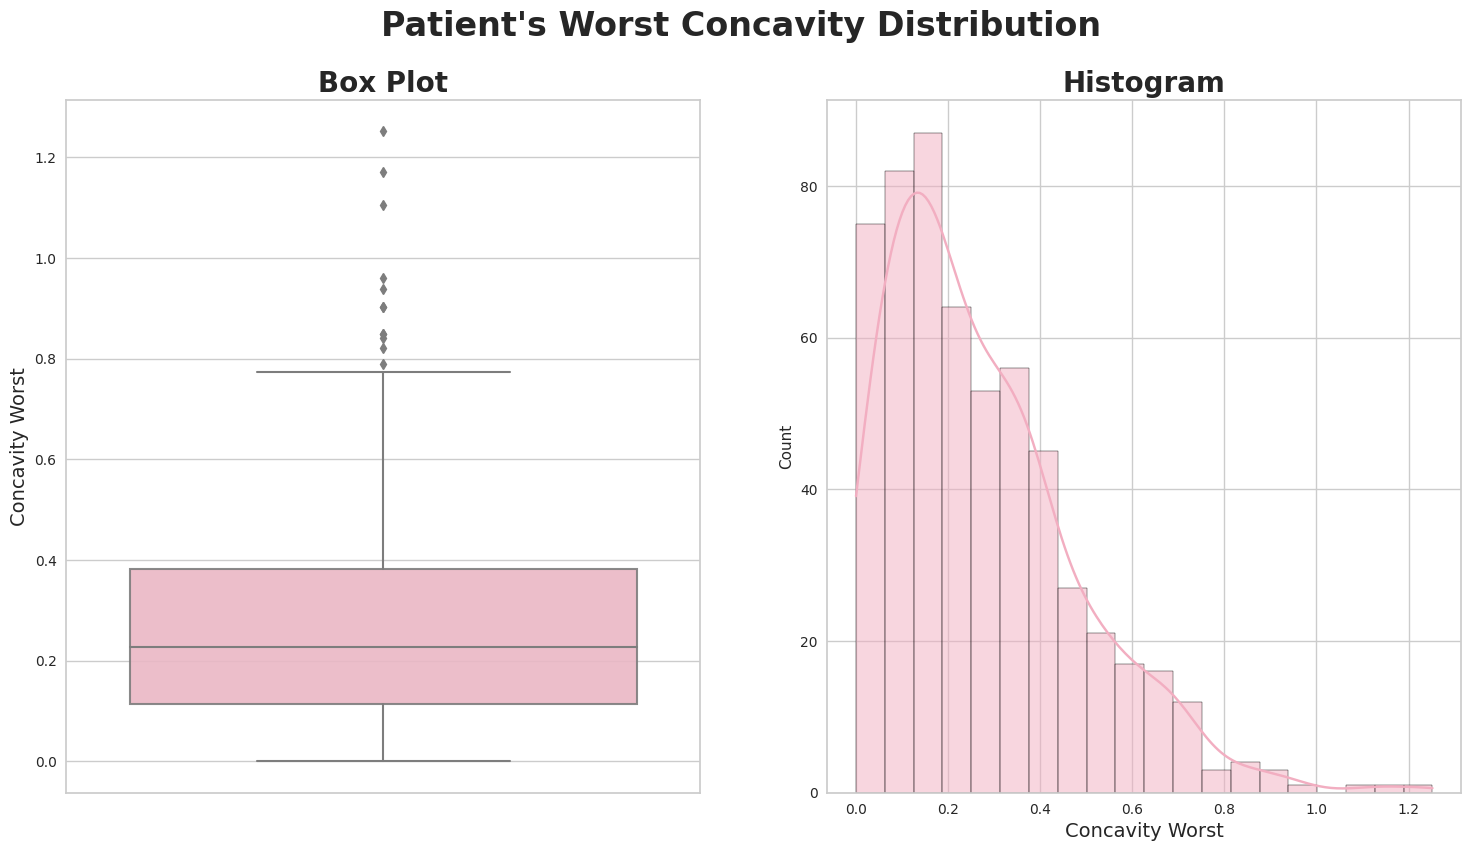

In [61]:
color = '#F2AEC1'
fig = plt.figure(figsize=(18,9))

fig.suptitle("Patient's Worst Concavity Distribution", fontweight='heavy', fontsize='24')

ax1 = fig.add_subplot(1,2,1)
plt.title('Box Plot', fontweight='bold', fontsize='20')
sns.boxplot(data=df, y='concavity_worst', color=color, boxprops=dict(alpha=0.9), linewidth=1.5)
plt.ylabel('Concavity Worst', fontweight='medium', fontsize='14')

ax2 = fig.add_subplot(1,2,2)
plt.title('Histogram', fontweight='bold', fontsize='20')
sns.histplot(data=df, x='concavity_worst', kde=True, color=color)
plt.xlabel('Concavity Worst', fontweight='medium', fontsize='14')

plt.show()

In [62]:
# -- IQR Calculation --
q1 = np.percentile(df['concavity_worst'], 25)
q3 = np.percentile(df['concavity_worst'], 75)
iqr = q3 - q1

# -- Lower Limit Calculation --
ll = q1 - (1.5 * iqr)

# -- Upper Limit Calculation --
ul = q3 + (1.5 * iqr)

# -- Print --
print("Calculation result\n")
print("Inter Quartil Range\t: {:.3f}".format(iqr))
print("Lower Limit\t\t: {:.3f}".format(ll))
print("Upper Limit\t\t: {:.3f}".format(ul))

Calculation result

Inter Quartil Range	: 0.268
Lower Limit		: -0.288
Upper Limit		: 0.786


<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">From the calculation, we have an <b>Inter Quartile Range</b> value of <b><mark>0.268</mark></b>, a <b>Lower Limit</b> value of <b><mark>-0.288</b></mark>, and an <b>Upper Limit</b> value of <b><mark>0.786</b></mark>. Also, it can be seen from the box plot, there are <b><mark>some outliers</b></mark> on the upper side of the data. The histogram also says that the data are <b><mark>left skewed</b></mark>.</div>

## <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">4.28 | concave_points_worst </div>
<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">
    Worst Concave Points
</div>

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


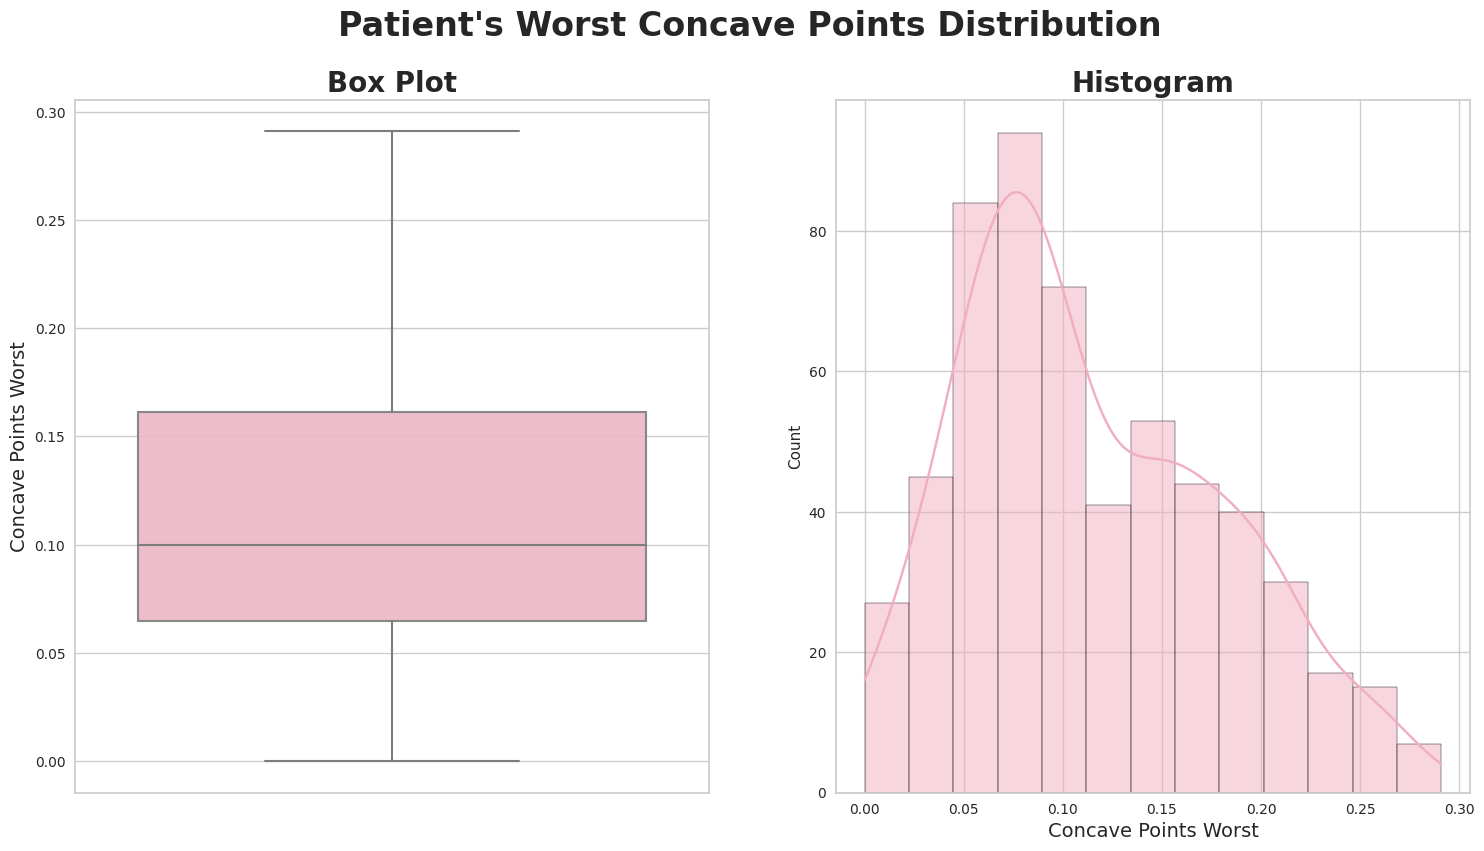

In [63]:
color = '#F2AEC1'
fig = plt.figure(figsize=(18,9))

fig.suptitle("Patient's Worst Concave Points Distribution", fontweight='heavy', fontsize='24')

ax1 = fig.add_subplot(1,2,1)
plt.title('Box Plot', fontweight='bold', fontsize='20')
sns.boxplot(data=df, y='concave_points_worst', color=color, boxprops=dict(alpha=0.9), linewidth=1.5)
plt.ylabel('Concave Points Worst', fontweight='medium', fontsize='14')

ax2 = fig.add_subplot(1,2,2)
plt.title('Histogram', fontweight='bold', fontsize='20')
sns.histplot(data=df, x='concave_points_worst', kde=True, color=color)
plt.xlabel('Concave Points Worst', fontweight='medium', fontsize='14')

plt.show()

In [64]:
# -- IQR Calculation --
q1 = np.percentile(df['concave_points_worst'], 25)
q3 = np.percentile(df['concave_points_worst'], 75)
iqr = q3 - q1

# -- Lower Limit Calculation --
ll = q1 - (1.5 * iqr)

# -- Upper Limit Calculation --
ul = q3 + (1.5 * iqr)

# -- Print --
print("Calculation result\n")
print("Inter Quartil Range\t: {:.3f}".format(iqr))
print("Lower Limit\t\t: {:.3f}".format(ll))
print("Upper Limit\t\t: {:.3f}".format(ul))

Calculation result

Inter Quartil Range	: 0.096
Lower Limit		: -0.080
Upper Limit		: 0.306


<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">From the calculation, we have an <b>Inter Quartile Range</b> value of <b><mark>0.096</mark></b>, a <b>Lower Limit</b> value of <b><mark>-0.080</b></mark>, and an <b>Upper Limit</b> value of <b><mark>0.306</b></mark>. Also, it can be seen from the box plot, there is <b><mark>no outlier</b></mark> on the data. The histogram also says that the data are <b><mark>left skewed</b></mark>.</div>

## <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">4.29 | symmetry_worst </div>
<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">
    Worst Symmetry
</div>

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


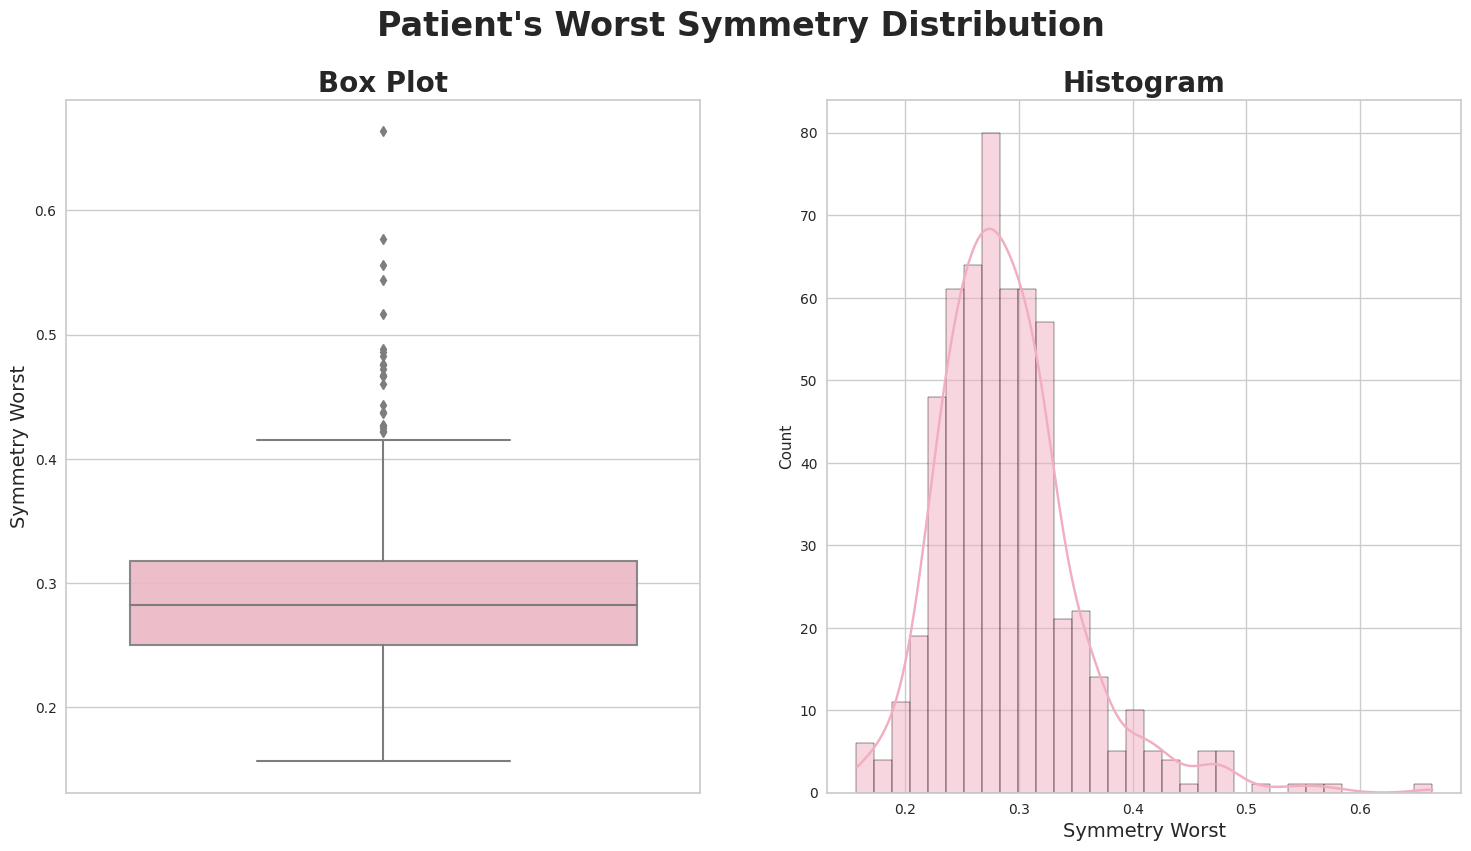

In [65]:
color = '#F2AEC1'
fig = plt.figure(figsize=(18,9))

fig.suptitle("Patient's Worst Symmetry Distribution", fontweight='heavy', fontsize='24')

ax1 = fig.add_subplot(1,2,1)
plt.title('Box Plot', fontweight='bold', fontsize='20')
sns.boxplot(data=df, y='symmetry_worst', color=color, boxprops=dict(alpha=0.9), linewidth=1.5)
plt.ylabel('Symmetry Worst', fontweight='medium', fontsize='14')

ax2 = fig.add_subplot(1,2,2)
plt.title('Histogram', fontweight='bold', fontsize='20')
sns.histplot(data=df, x='symmetry_worst', kde=True, color=color)
plt.xlabel('Symmetry Worst', fontweight='medium', fontsize='14')

plt.show()

In [66]:
# -- IQR Calculation --
q1 = np.percentile(df['symmetry_worst'], 25)
q3 = np.percentile(df['symmetry_worst'], 75)
iqr = q3 - q1

# -- Lower Limit Calculation --
ll = q1 - (1.5 * iqr)

# -- Upper Limit Calculation --
ul = q3 + (1.5 * iqr)

# -- Print --
print("Calculation result\n")
print("Inter Quartil Range\t: {:.3f}".format(iqr))
print("Lower Limit\t\t: {:.3f}".format(ll))
print("Upper Limit\t\t: {:.3f}".format(ul))

Calculation result

Inter Quartil Range	: 0.068
Lower Limit		: 0.149
Upper Limit		: 0.419


<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">From the calculation, we have an <b>Inter Quartile Range</b> value of <b><mark>0.068</mark></b>, a <b>Lower Limit</b> value of <b><mark>0.149</b></mark>, and an <b>Upper Limit</b> value of <b><mark>0.419</b></mark>. Also, it can be seen from the box plot, there are <b><mark>some outliers</b></mark> on the upper side of the data. The histogram also says that the data are <b><mark>left skewed</b></mark>.</div>

## <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">4.30 | fractal_dimension_worst </div>
<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">
    Worst Fractal Dimension
</div>

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


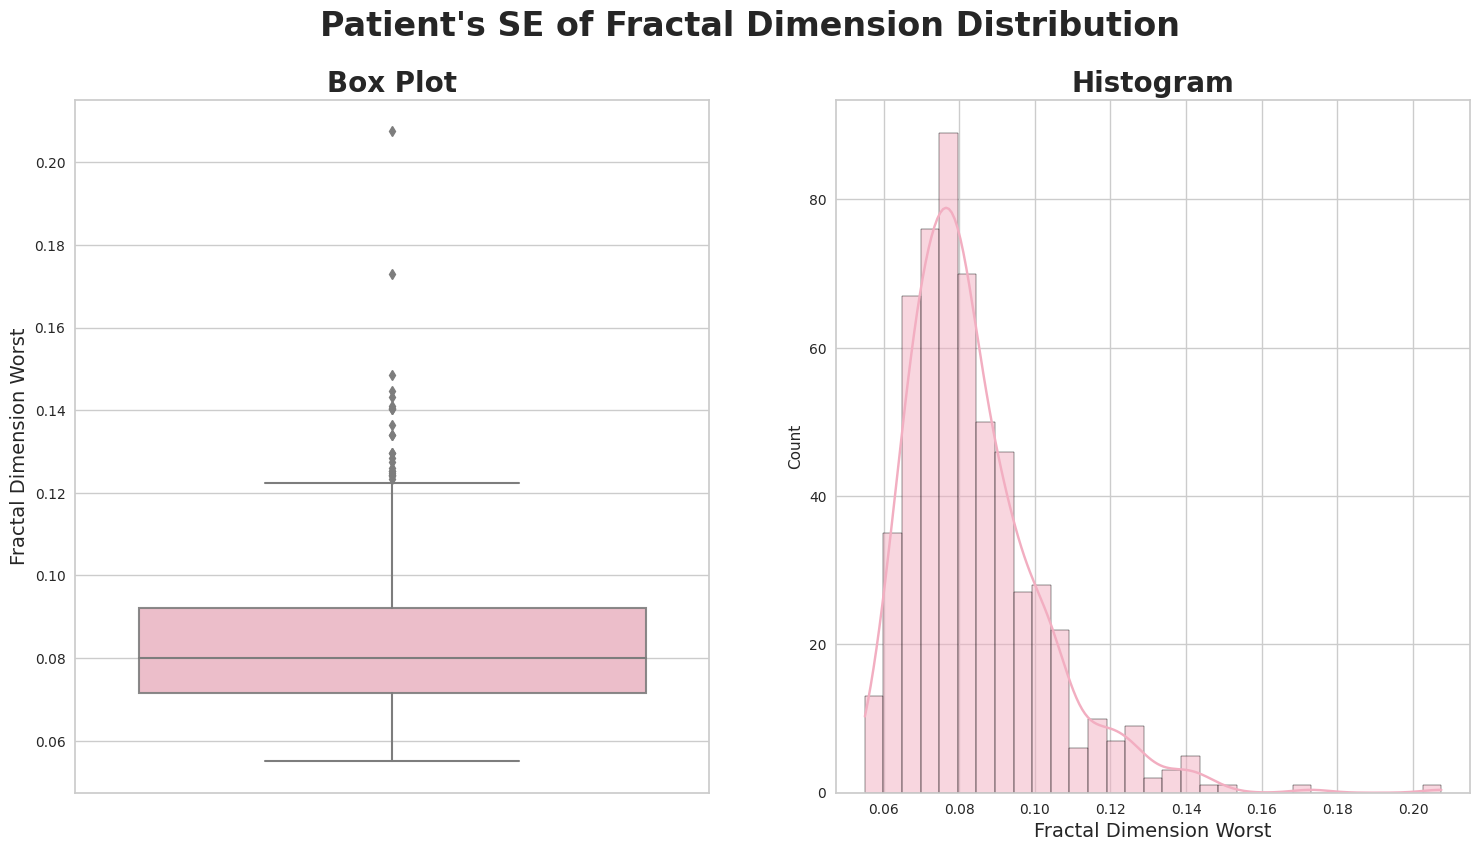

In [67]:
color = '#F2AEC1'
fig = plt.figure(figsize=(18,9))

fig.suptitle("Patient's SE of Fractal Dimension Distribution", fontweight='heavy', fontsize='24')

ax1 = fig.add_subplot(1,2,1)
plt.title('Box Plot', fontweight='bold', fontsize='20')
sns.boxplot(data=df, y='fractal_dimension_worst', color=color, boxprops=dict(alpha=0.9), linewidth=1.5)
plt.ylabel('Fractal Dimension Worst', fontweight='medium', fontsize='14')

ax2 = fig.add_subplot(1,2,2)
plt.title('Histogram', fontweight='bold', fontsize='20')
sns.histplot(data=df, x='fractal_dimension_worst', kde=True, color=color)
plt.xlabel('Fractal Dimension Worst', fontweight='medium', fontsize='14')

plt.show()

In [68]:
# -- IQR Calculation --
q1 = np.percentile(df['fractal_dimension_worst'], 25)
q3 = np.percentile(df['fractal_dimension_worst'], 75)
iqr = q3 - q1

# -- Lower Limit Calculation --
ll = q1 - (1.5 * iqr)

# -- Upper Limit Calculation --
ul = q3 + (1.5 * iqr)

# -- Print --
print("Calculation result\n")
print("Inter Quartil Range\t: {:.3f}".format(iqr))
print("Lower Limit\t\t: {:.3f}".format(ll))
print("Upper Limit\t\t: {:.3f}".format(ul))

Calculation result

Inter Quartil Range	: 0.021
Lower Limit		: 0.041
Upper Limit		: 0.123


<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">From the calculation, we have an <b>Inter Quartile Range</b> value of <b><mark>0.021</mark></b>, a <b>Lower Limit</b> value of <b><mark>0.041</b></mark>, and an <b>Upper Limit</b> value of <b><mark>0.123</b></mark>. Also, it can be seen from the box plot, there are <b><mark>some outliers</b></mark> on the upper side of the data. The histogram also says that the data are <b><mark>left skewed</b></mark>.</div>

## <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">4.31 | diagnosis </div>

In [69]:
df['diagnosis'].value_counts().index

Index(['B', 'M'], dtype='object', name='diagnosis')

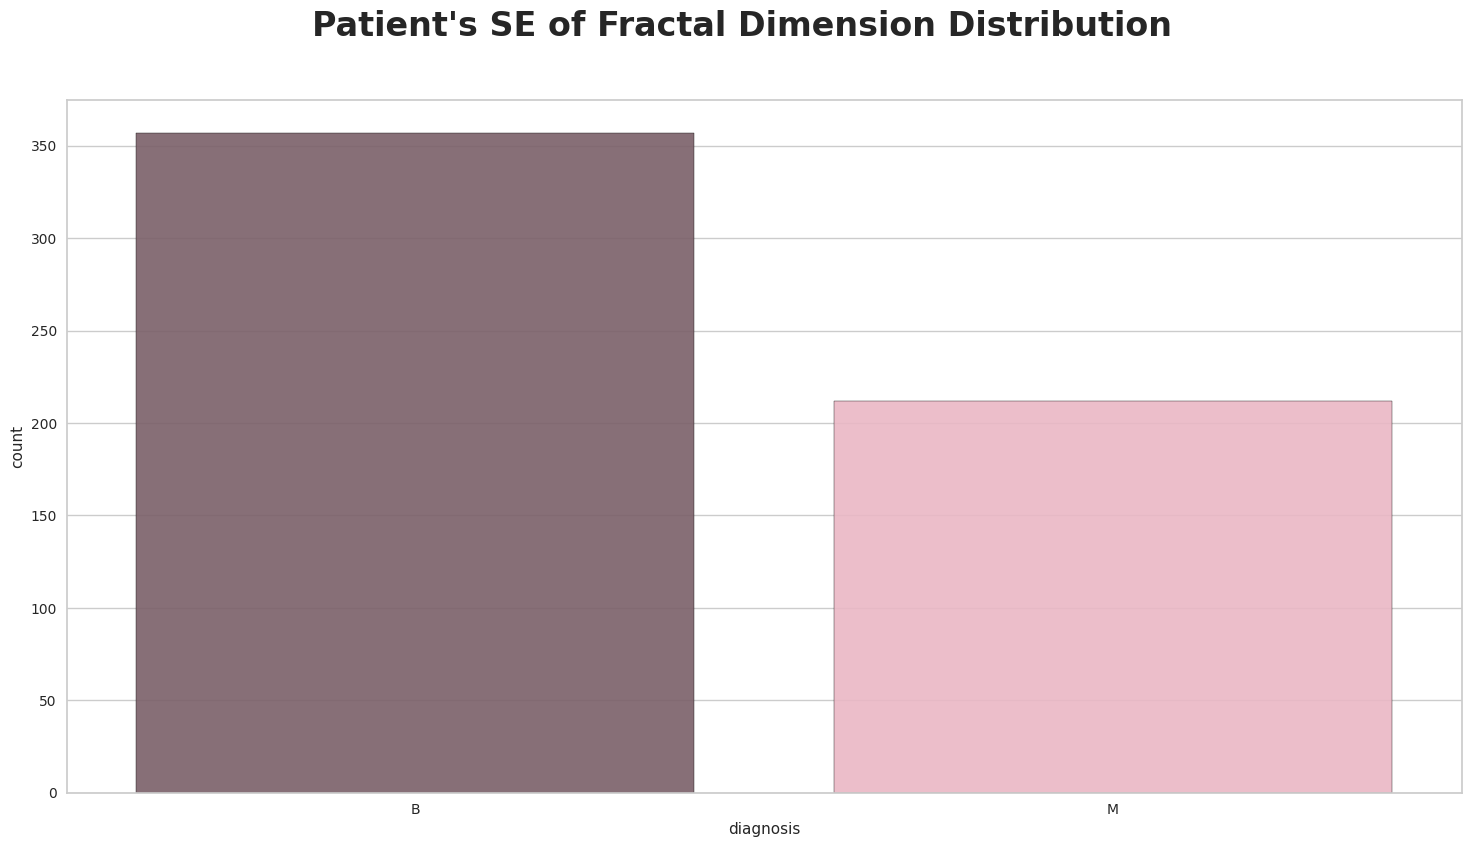

In [70]:
colors = ['#7E5B66', '#F2AEC1']
order = df['diagnosis'].value_counts().index

fig = plt.figure(figsize=(18,9))
fig.suptitle("Patient's SE of Fractal Dimension Distribution", fontweight='heavy', fontsize='24')

sns.countplot(x='diagnosis', data=df, palette=colors, order=order, alpha=0.9, edgecolor='#000000')
plt.show()

## <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">4.32 | Heatmap </div>

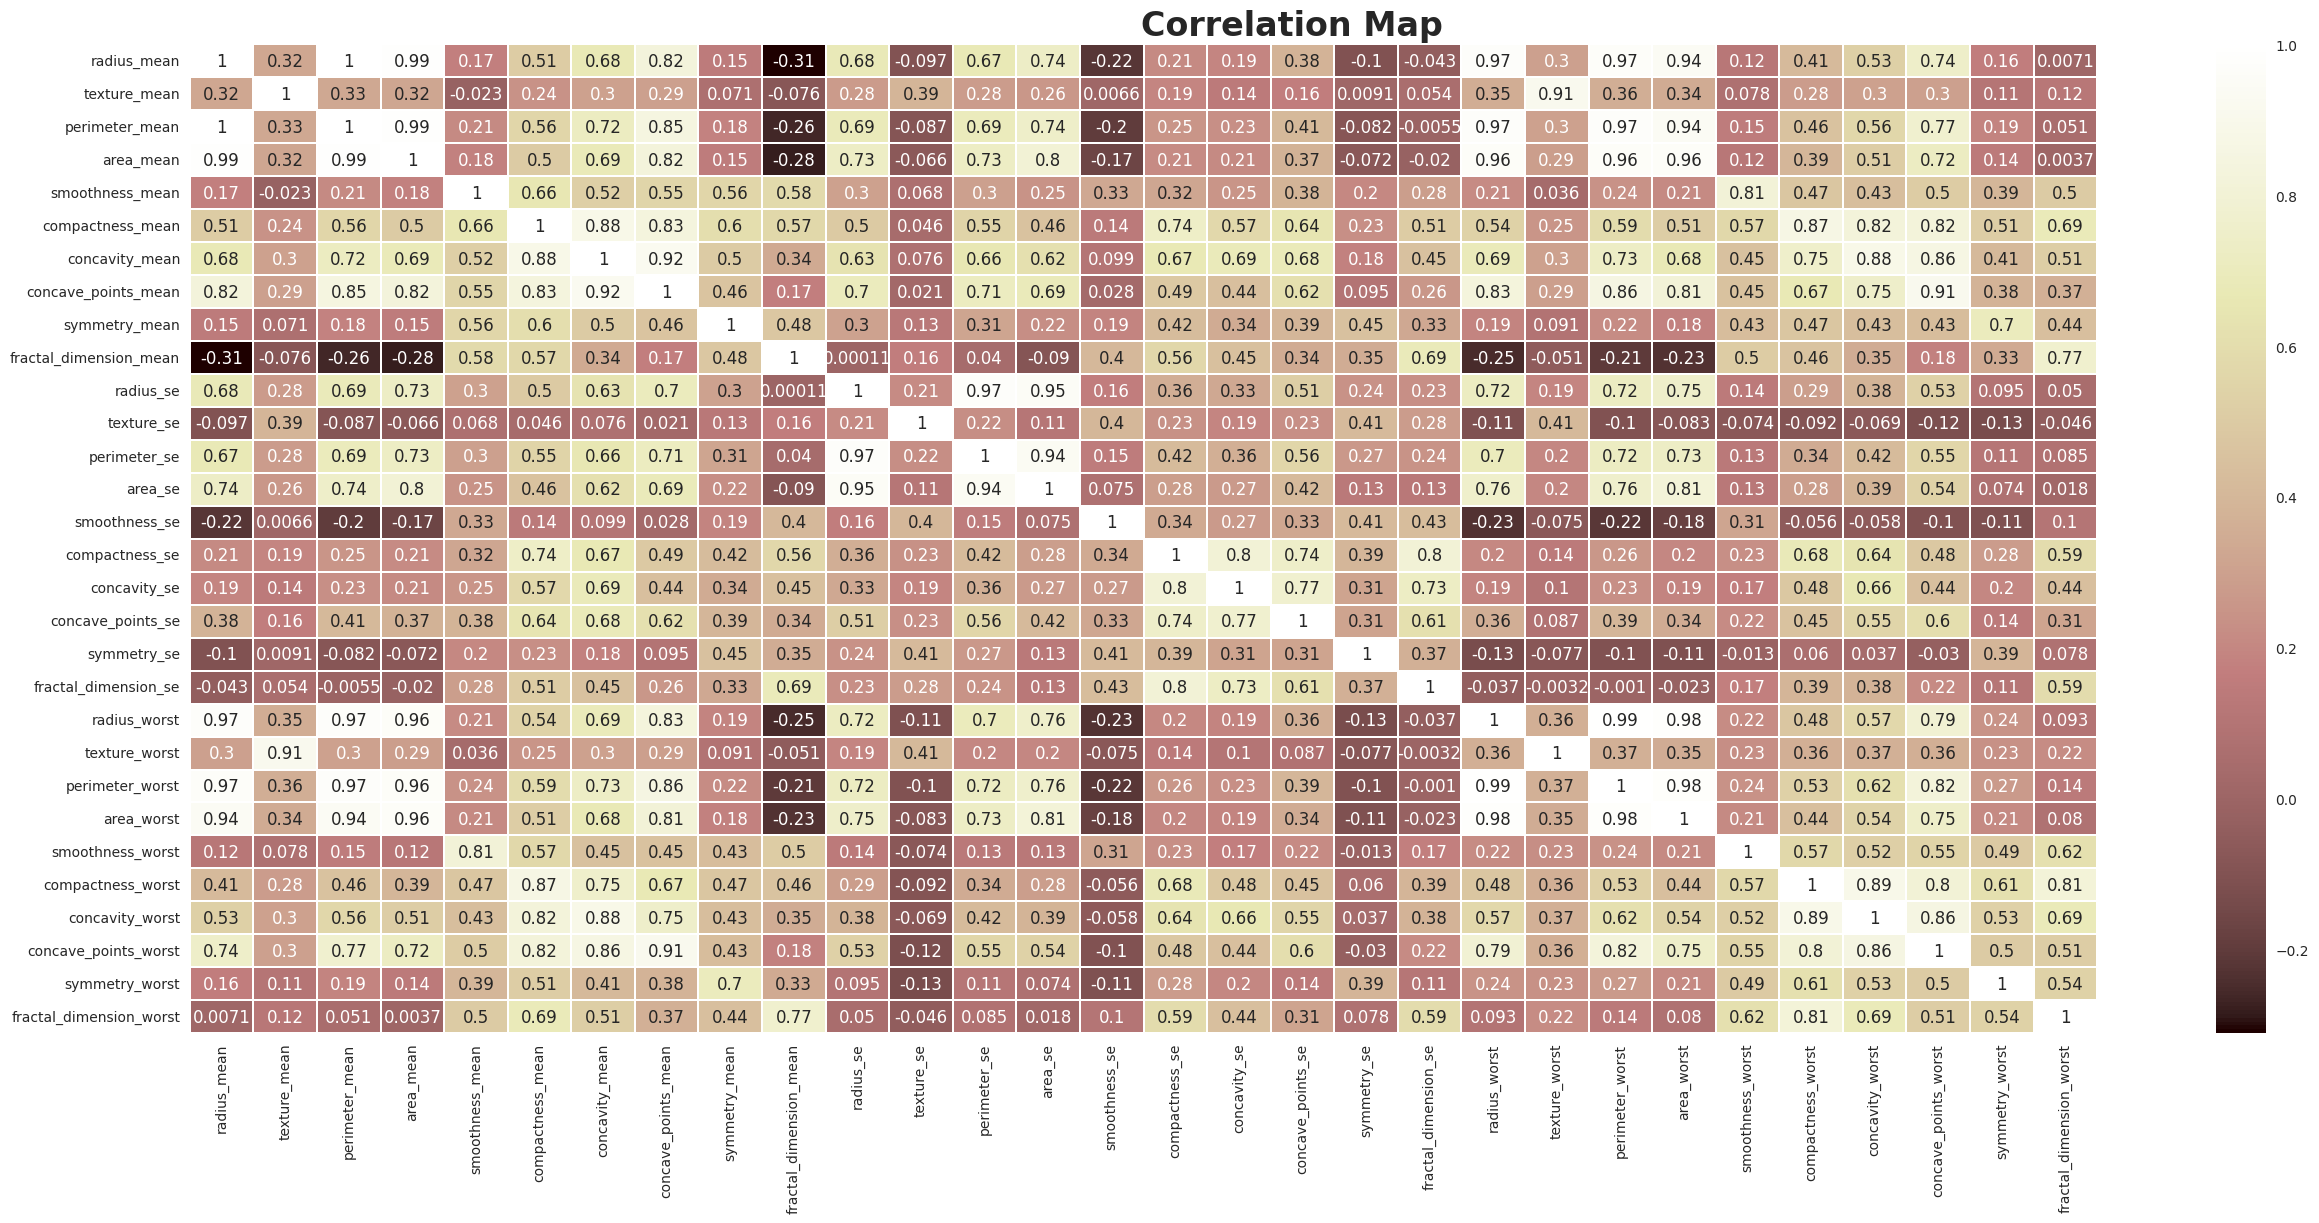

In [71]:
df_heatmap = df.drop(['id', 'diagnosis'], axis=1)

plt.figure(figsize=(26,13))
sns.heatmap(df_heatmap.corr(), annot=True, cmap='pink', linewidths=0.1)
plt.suptitle('Correlation Map', fontweight='heavy', fontsize='24')
plt.tight_layout(rect=[0, 0.04, 1, 1.01])

# <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">5 | Dataset Pre-Processing </div>
<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">
    This section will prepare the dataset before applying the machine learning model. In this section, there will be dropping the id column and using data normalization using MinMaxScaler.
</div>

## <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">5.1 | Dropping Unnecessary Columns </div>

In [72]:
df = df.drop(columns=['id'], axis=1)
df.head(1).style.background_gradient(cmap='pink').hide()

diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
M,17.990000,10.380000,122.800000,1001.000000,0.118400,0.277600,0.300100,0.147100,0.241900,0.078710,1.095000,0.905300,8.589000,153.400000,0.006399,0.049040,0.053730,0.015870,0.030030,0.006193,25.380000,17.330000,184.600000,2019.000000,0.162200,0.665600,0.711900,0.265400,0.460100,0.118900


## <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">5.2 | Features Separating </div>

In [73]:
x = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

## <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">5.3 | Data Normalization </div>

In [74]:
x = MinMaxScaler().fit_transform(x)

## <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">5.4 | Splitting the Dataset </div>

In [75]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">6 | Model Implementation </div>
<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">
    In this section, the Linear SVC module will be used.
</div>

In [76]:
model = LinearSVC(random_state=1)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

LinearSVC Accuracy:97.37

Classification Report

              precision    recall  f1-score   support

           B       0.96      1.00      0.98        72
           M       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

Performance Evaluation


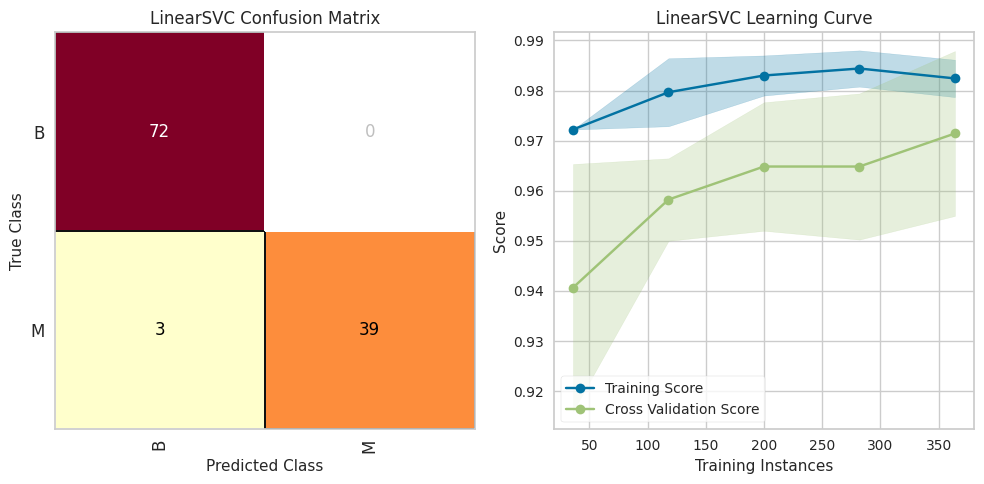

In [77]:
model_acc = accuracy_score(y_pred, y_test)
print('LinearSVC Accuracy:'+'{:.2f}'.format(model_acc*100)+'\n')

print('Classification Report\n')
print(classification_report(y_test, y_pred))

print('Performance Evaluation')
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(10,5))

model_matrix = ConfusionMatrix(model, ax=ax1, cmap='YlOrRd', title='LinearSVC Confusion Matrix')
model_matrix.fit(x_train, y_train)
model_matrix.score(x_test, y_test)
model_matrix.finalize()

model_lc = LearningCurve(model, ax=ax2, title='LinearSVC Learning Curve')
model_lc.fit(x_train, y_train)
model_lc.finalize()

plt.tight_layout()

/opt/conda/lib/python3.10/site-packages/yellowbrick/model_selection/importances.py:194: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  warnings.warn(


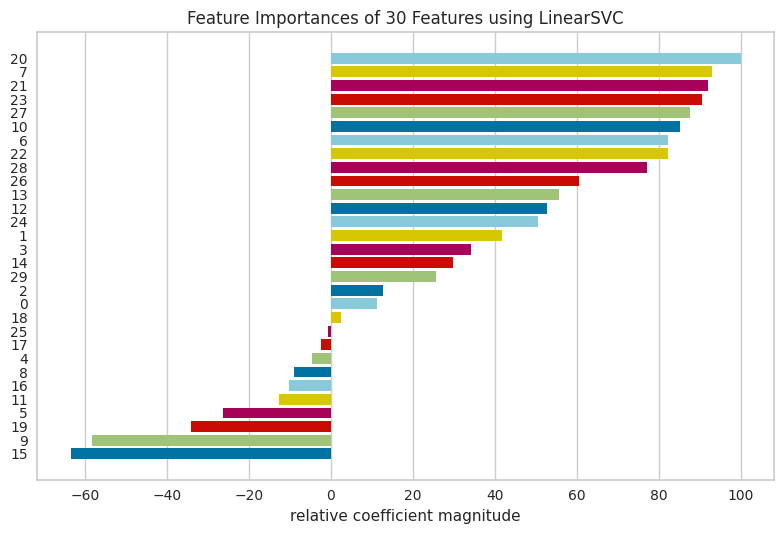

<Axes: title={'center': 'Feature Importances of 30 Features using LinearSVC'}, xlabel='relative coefficient magnitude'>

In [78]:
viz = FeatureImportances(model)
viz.fit(x, y)
viz.show()

# <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">7 | Prediction Case </div>
<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">
    In this section, there will be 2 kinds of tests. First, I will use 1 random data from the dataset, and then compare the result class with the original class. Second, I will generate fully random data outside of the original dataset, to make it like a real-life case.
</div>

## <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">7.1 | Data from the Dataset </div>

In [79]:
# -- Obtaining Data --
test1 = df.sample(1)
test1

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
273,B,9.742,15.67,61.5,289.9,0.09037,0.04689,0.01103,0.01407,0.2081,...,10.75,20.88,68.09,355.2,0.1467,0.0937,0.04043,0.05159,0.2841,0.08175


In [80]:
# -- Feature separating --
X = test1.drop(['diagnosis'], axis=1)
Y = test1['diagnosis']
print("Target value: ", Y)

Target value:  273    B
Name: diagnosis, dtype: object


In [81]:
# -- MinMaxScaler --
X = MinMaxScaler().fit_transform(X)

In [82]:
# -- Predict result --
result1 = model.predict(X)

if result1[0] == 'M':
    print("Diagnose Result: Cancerous")
else:
    print("Diagnose Result: Non Cancerous")

Diagnose Result: Non Cancerous


## <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">7.2 | Data Random </div>

In [83]:
# -- Generate random sample --
# This sample data assumed be normalized
test2 = np.random.random_sample((30))
test2

array([0.11561574, 0.80597077, 0.42676419, 0.77532833, 0.11858528,
       0.66491641, 0.97970164, 0.63868783, 0.58641824, 0.71273311,
       0.02045962, 0.10431012, 0.60385058, 0.55006541, 0.29373685,
       0.69670223, 0.41579057, 0.78235238, 0.03620373, 0.56785518,
       0.53309129, 0.86651543, 0.99096932, 0.99854476, 0.51188527,
       0.5638942 , 0.68893929, 0.29220681, 0.82940894, 0.29508755])

In [84]:
# -- Data reshape --
X = test2.reshape(1, -1)

In [85]:
# -- Predict result --
result2 = model.predict(X)

if result2[0] == 'M':
    print("Diagnose Result: Cancerous")
else:
    print("Diagnose Result: Non Cancerous")

Diagnose Result: Cancerous


# <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">References </div>
<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">
    <ol>
        <li><a href="https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset">Breast Cancer Dataset</a></li>
        <li><a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC">sklearn.svm.LinearSVC -- scikit-learn 1.4.1 documentation</a></li>
        <li><a href="https://www.scikit-yb.org/en/latest/index.html">Yellowbrick v1.5 documentation</a></li>
    </ol>
</div>

<center>
    <div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 10px;">
        Breast Cancer Prediction (Version 1) | Released: 16 February 2024 | rafiromolo
    </div>
</center>